In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [2]:
df=pd.read_csv('super market.csv',encoding='latin-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date.1    9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

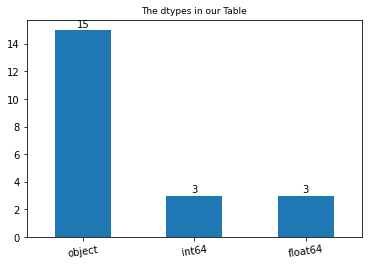

In [3]:
#NO missing Values
#checkin for the Data type in our columns

fig=df.dtypes.value_counts().plot(kind='bar')
plt.title('The dtypes in our Table',fontsize=9)
plt.xticks(rotation=8)

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

#In the table superStore we have more object columns than int and flloats columns

We have 21 columns, and 9994 rows

we have to correct the date columns to a proper date format

In [4]:
#No missing Data
#one thing is missing;we need to correct the Date columns

df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date.1']=pd.to_datetime(df['Ship Date.1'])

In [5]:
#to confirm the correction

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date.1    9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

High variance in our datapoint 

let check for out outlier

<AxesSubplot:xlabel='Sales'>

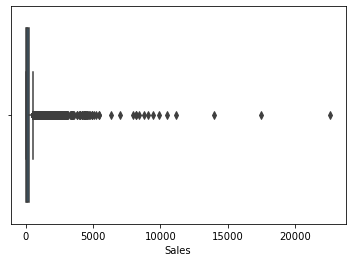

In [7]:
#Let check for outliers

sns.boxplot(data=df,x='Sales')

In [9]:
##Omoh outliers Yapaaa

In [10]:
df['Sales'].sort_values(ascending=False),df['Quantity'].sort_values(ascending=False)

(6751    22638.480
 1843    17499.950
 8040    13999.960
 5138    11199.968
 2926    10499.970
           ...    
 1497        0.876
 2969        0.852
 1583        0.836
 1754        0.556
 1203        0.444
 Name: Sales, Length: 9994, dtype: float64,
 8686    14
 6767    14
 8385    14
 9041    14
 9546    14
         ..
 4288     1
 7324     1
 6281     1
 4292     1
 2524     1
 Name: Quantity, Length: 9994, dtype: int64)

From the above datapoint we have high variace of data point in Sales while

why in quantity we have Balance datapoint not excessive; buut really it might been high price in high price on goods

In [8]:
#observation the quantity varaible is Looking Good there no outragoues figures
#let check the Type of goods they are the sales are setting high prices for?

df[['Category','Sales']].groupby('Category').sum()
df[['Sub-Category','Category','Sales']].groupby(by=['Sub-Category','Category']).sum()

Sales
Sub-Category Category                    
Accessories  Technology       167380.3180
Appliances   Office Supplies  107532.1610
Art          Office Supplies   27118.7920
Binders      Office Supplies  203412.7330
Bookcases    Furniture        114879.9963
Chairs       Furniture        328449.1030
Copiers      Technology       149528.0300
Envelopes    Office Supplies   16476.4020
Fasteners    Office Supplies    3024.2800
Furnishings  Furniture         91705.1640
Labels       Office Supplies   12486.3120
Machines     Technology       189238.6310
Paper        Office Supplies   78479.2060
Phones       Technology       330007.0540
Storage      Office Supplies  223843.6080
Supplies     Office Supplies   46673.5380
Tables       Furniture        206965.5320

In [9]:
df.sample(4)

Row ID        Order ID Order Date Ship Date.1       Ship Mode  \
5165    3909  CA-2015-167010 2015-04-05  2015-04-10  Standard Class   
2266    8260  CA-2016-118101 2016-06-26  2016-06-26        Same Day   
9368    9554  CA-2016-125724 2016-09-22  2016-09-27  Standard Class   
5754    6636  CA-2017-144498 2017-05-06  2017-05-06        Same Day   

     Customer ID     Customer Name      Segment        Country          City  \
5165    VT-21700  Valerie Takahito  Home Office  United States  Philadelphia   
2266    SN-20560      Skye Norling  Home Office  United States     Roseville   
9368    SM-20950    Suzanne McNair    Corporate  United States    Broomfield   
5754    MB-18085        Mick Brown     Consumer  United States     Charlotte   

      ... Postal Code   Region       Product ID         Category Sub-Category  \
5165  ...       19143     East  TEC-PH-10002844       Technology       Phones   
2266  ...       48066  Central  OFF-PA-10000357  Office Supplies        Paper   
9368  ...       80020     West  FUR-FU-10000246        Furniture  Furnishings   
5754  ...       28205    South  TEC-PH-10004977       Technology       Phones   

                                           Product Name    Sales  Quantity  \
5165                Speck Products Candyshell Flip Case   41.988         2   
2266  White Dual Perf Computer Printout Paper, 2700 ...  368.910         9   
9368                            Aluminum Document Frame   68.432         7   
5754                                        GE 30524EE4  627.168         4   

      Discount    Profit  
5165       0.4   -9.7972  
2266       0.0  180.7659  
9368       0.2    8.5540  
5754       0.2   70.5564  

[4 rows x 21 columns]

In [10]:
df[['Category','Sales','Quantity']].groupby('Category').sum()

Sales  Quantity
Category                              
Furniture        741999.7953      8028
Office Supplies  719047.0320     22906
Technology       836154.0330      6939

<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

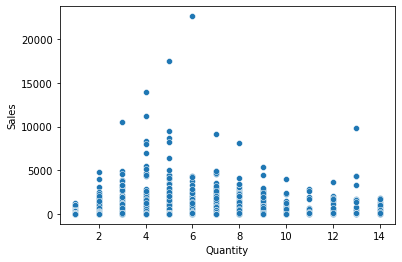

In [11]:
sns.scatterplot(data=df,x='Quantity',y='Sales')

In [12]:
present_outliers=df[df['Sales']<=5000]

present_outliers.head()

Row ID        Order ID Order Date Ship Date.1       Ship Mode Customer ID  \
0    8223  CA-2014-152905 2014-02-18  2014-02-24  Standard Class    AB-10015   
1    8802  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
2    8803  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
3    1988  CA-2015-127509 2015-11-09  2015-11-13  Standard Class    AS-10090   
4    1989  CA-2015-127509 2015-11-09  2015-11-13  Standard Class    AS-10090   

        Customer Name   Segment        Country           City  ...  \
0       Aaron Bergman  Consumer  United States      Arlington  ...   
1       Aaron Bergman  Consumer  United States  Oklahoma City  ...   
2       Aaron Bergman  Consumer  United States  Oklahoma City  ...   
3  Adam Shillingsburg  Consumer  United States    Springfield  ...   
4  Adam Shillingsburg  Consumer  United States    Springfield  ...   

  Postal Code   Region       Product ID         Category Sub-Category  \
0       76017  Central  OFF-ST-10000321  Office Supplies      Storage   
1       73120  Central  TEC-PH-10000562       Technology       Phones   
2       73120  Central  FUR-BO-10003966        Furniture    Bookcases   
3       65807  Central  OFF-BI-10002393  Office Supplies      Binders   
4       65807  Central  FUR-TA-10002855        Furniture       Tables   

                                        Product Name     Sales  Quantity  \
0                                 Akro Stacking Bins    12.624         2   
1                                   Samsung Convoy 3   221.980         2   
2  Sauder Facets Collection Library, Sky Alder Fi...   341.960         2   
3                                       Binder Posts    17.220         3   
4  Bevis Round Conference Table Top & Single Colu...  1024.380         7   

   Discount    Profit  
0       0.2   -2.5248  
1       0.0   62.1544  
2       0.0   54.7136  
3       0.0    7.9212  
4       0.0  215.1198  

[5 rows x 21 columns]

In [13]:
df[df['Sales']>=5000]

Row ID        Order ID Order Date Ship Date.1       Ship Mode  \
17      9040  CA-2016-117121 2016-12-17  2016-12-21  Standard Class   
71      6521  CA-2017-138289 2017-01-16  2017-01-18    Second Class   
119      166  CA-2014-139892 2014-09-08  2014-09-12  Standard Class   
1033    4099  CA-2014-116904 2014-09-23  2014-09-28  Standard Class   
1843    6827  CA-2016-118689 2016-10-02  2016-10-09  Standard Class   
2626    6426  CA-2016-143714 2016-05-23  2016-05-27  Standard Class   
2926    4191  CA-2017-166709 2017-11-17  2017-11-22  Standard Class   
3738    6627  CA-2014-145541 2014-12-14  2014-12-21  Standard Class   
3898    4278  US-2016-107440 2016-04-16  2016-04-20  Standard Class   
4644    6341  CA-2017-143112 2017-10-05  2017-10-09  Standard Class   
4789    7667  US-2016-140158 2016-10-04  2016-10-08  Standard Class   
5138    2624  CA-2017-127180 2017-10-22  2017-10-24     First Class   
5332     510  CA-2015-145352 2015-03-16  2015-03-22  Standard Class   
5893    8489  CA-2016-158841 2016-02-02  2016-02-04    Second Class   
6217     684  US-2017-168116 2017-11-04  2017-11-04        Same Day   
6751    2698  CA-2014-145317 2014-03-18  2014-03-23  Standard Class   
7654    2506  CA-2014-143917 2014-07-25  2014-07-27    Second Class   
8040    8154  CA-2017-140151 2017-03-23  2017-03-25     First Class   
8963    8859  CA-2017-135909 2017-10-13  2017-10-20  Standard Class   

     Customer ID         Customer Name      Segment        Country  \
17      AB-10105         Adrian Barton     Consumer  United States   
71      AR-10540           Andy Reiter     Consumer  United States   
119     BM-11140          Becky Martin     Consumer  United States   
1033    SC-20095          Sanjit Chand     Consumer  United States   
1843    TC-20980          Tamara Chand    Corporate  United States   
2626    CC-12370    Christopher Conant     Consumer  United States   
2926    HL-15040          Hunter Lopez     Consumer  United States   
3738    TB-21400      Tom Boeckenhauer     Consumer  United States   
3898    BS-11365          Bill Shonely    Corporate  United States   
4644    TS-21370          Todd Sumrall    Corporate  United States   
4789    DR-12940         Daniel Raglin  Home Office  United States   
5138    TA-21385          Tom Ashbrook  Home Office  United States   
5332    CM-12385  Christopher Martinez     Consumer  United States   
5893    SE-20110          Sanjit Engle     Consumer  United States   
6217    GT-14635        Grant Thornton    Corporate  United States   
6751    SM-20320           Sean Miller  Home Office  United States   
7654    KL-16645          Ken Lonsdale     Consumer  United States   
8040    RB-19360          Raymond Buch     Consumer  United States   
8963    JW-15220             Jane Waco    Corporate  United States   

               City  ... Postal Code   Region       Product ID  \
17          Detroit  ...       48205  Central  OFF-BI-10000545   
71          Jackson  ...       49201  Central  OFF-BI-10004995   
119     San Antonio  ...       78207  Central  TEC-MA-10000822   
1033    Minneapolis  ...       55407  Central  OFF-BI-10001120   
1843      Lafayette  ...       47905  Central  TEC-CO-10004722   
2626   Philadelphia  ...       19120     East  TEC-CO-10004722   
2926         Newark  ...       19711     East  TEC-CO-10004722   
3738  New York City  ...       10024     East  TEC-MA-10001127   
3898       Lakewood  ...        8701     East  TEC-MA-10001047   
4644  New York City  ...       10035     East  TEC-MA-10001047   
4789     Providence  ...        2908     East  TEC-CO-10001449   
5138  New York City  ...       10024     East  TEC-CO-10004722   
5332        Atlanta  ...       30318    South  OFF-BI-10003527   
5893      Arlington  ...       22204    South  TEC-MA-10001127   
6217     Burlington  ...       27217    South  TEC-MA-10004125   
6751   Jacksonville  ...       32216    South  TEC-MA-10002412   
7654  San Francisco  ...       94122     West  OFF-SU-10000151

In [14]:
#there is No Outliers.
#it should be known that it was the product Category prices and quantity of Goods that determines the prices. 

In [15]:
df.head()

Row ID        Order ID Order Date Ship Date.1       Ship Mode Customer ID  \
0    8223  CA-2014-152905 2014-02-18  2014-02-24  Standard Class    AB-10015   
1    8802  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
2    8803  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
3    1988  CA-2015-127509 2015-11-09  2015-11-13  Standard Class    AS-10090   
4    1989  CA-2015-127509 2015-11-09  2015-11-13  Standard Class    AS-10090   

        Customer Name   Segment        Country           City  ...  \
0       Aaron Bergman  Consumer  United States      Arlington  ...   
1       Aaron Bergman  Consumer  United States  Oklahoma City  ...   
2       Aaron Bergman  Consumer  United States  Oklahoma City  ...   
3  Adam Shillingsburg  Consumer  United States    Springfield  ...   
4  Adam Shillingsburg  Consumer  United States    Springfield  ...   

  Postal Code   Region       Product ID         Category Sub-Category  \
0       76017  Central  OFF-ST-10000321  Office Supplies      Storage   
1       73120  Central  TEC-PH-10000562       Technology       Phones   
2       73120  Central  FUR-BO-10003966        Furniture    Bookcases   
3       65807  Central  OFF-BI-10002393  Office Supplies      Binders   
4       65807  Central  FUR-TA-10002855        Furniture       Tables   

                                        Product Name     Sales  Quantity  \
0                                 Akro Stacking Bins    12.624         2   
1                                   Samsung Convoy 3   221.980         2   
2  Sauder Facets Collection Library, Sky Alder Fi...   341.960         2   
3                                       Binder Posts    17.220         3   
4  Bevis Round Conference Table Top & Single Colu...  1024.380         7   

   Discount    Profit  
0       0.2   -2.5248  
1       0.0   62.1544  
2       0.0   54.7136  
3       0.0    7.9212  
4       0.0  215.1198  

[5 rows x 21 columns]

let move to our EDA

In [16]:
#we need to extract day,monthName and year for the purpose of out analysis.

df['Year_Order']=pd.DatetimeIndex(df['Order Date']).year
df['DayName_OrderPlace']=pd.DatetimeIndex(df['Order Date']).day_name()
df['OrderPlace_MonthName']=pd.DatetimeIndex(df['Order Date']).month_name()

In [17]:
df['SHipDate_DayName']=pd.DatetimeIndex(df['Ship Date.1']).day_name()
df['SHipDate_Year']=pd.DatetimeIndex(df['Ship Date.1']).year
df['SHipDate_MonthName']=pd.DatetimeIndex(df['Ship Date.1']).month_name()

In [18]:
df.head()

Row ID        Order ID Order Date Ship Date.1       Ship Mode Customer ID  \
0    8223  CA-2014-152905 2014-02-18  2014-02-24  Standard Class    AB-10015   
1    8802  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
2    8803  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
3    1988  CA-2015-127509 2015-11-09  2015-11-13  Standard Class    AS-10090   
4    1989  CA-2015-127509 2015-11-09  2015-11-13  Standard Class    AS-10090   

        Customer Name   Segment        Country           City  ...     Sales  \
0       Aaron Bergman  Consumer  United States      Arlington  ...    12.624   
1       Aaron Bergman  Consumer  United States  Oklahoma City  ...   221.980   
2       Aaron Bergman  Consumer  United States  Oklahoma City  ...   341.960   
3  Adam Shillingsburg  Consumer  United States    Springfield  ...    17.220   
4  Adam Shillingsburg  Consumer  United States    Springfield  ...  1024.380   

   Quantity Discount    Profit Year_Order DayName_OrderPlace  \
0         2      0.2   -2.5248       2014            Tuesday   
1         2      0.0   62.1544       2016           Thursday   
2         2      0.0   54.7136       2016           Thursday   
3         3      0.0    7.9212       2015             Monday   
4         7      0.0  215.1198       2015             Monday   

  OrderPlace_MonthName  SHipDate_DayName  SHipDate_Year  SHipDate_MonthName  
0             February            Monday           2014            February  
1             November          Saturday           2016            November  
2             November          Saturday           2016            November  
3             November            Friday           2015            November  
4             November            Friday           2015            November  

[5 rows x 27 columns]

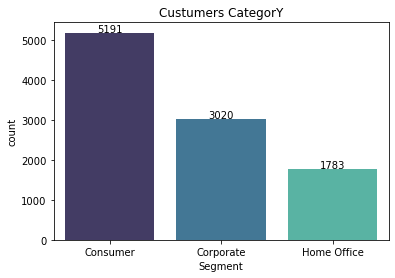

In [19]:
#How many custumers do we have?

label=sns.countplot(data=df,x='Segment',palette='mako')
plt.title('Custumers CategorY')

for container in label.containers:
    label.bar_label(container,label_type='edge',padding=-1)

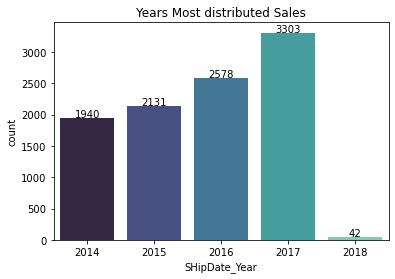

In [20]:
#Year most distributed Sales?

fig=sns.countplot(data=df,x='SHipDate_Year',palette='mako')
plt.title('Years Most distributed Sales')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

# Now let dive Deep to the Year 2017:
    Because in the 2017 is the most Years most distribution Sales:

In [21]:
two_seventy=df[df['SHipDate_Year']==2017]

In [22]:
two_seventy.head()

Row ID        Order ID Order Date Ship Date.1       Ship Mode Customer ID  \
7     2402  CA-2017-145877 2017-04-01  2017-04-04    Second Class    AS-10090   
8     2403  CA-2017-145877 2017-04-01  2017-04-04    Second Class    AS-10090   
14    3912  CA-2017-126788 2017-06-05  2017-06-06     First Class    AB-10105   
24    9208  CA-2017-140781 2017-08-03  2017-08-07  Standard Class    AB-10105   
25    1598  CA-2017-158876 2017-11-19  2017-11-21    Second Class    AB-10150   

         Customer Name   Segment        Country         City  ...    Sales  \
7   Adam Shillingsburg  Consumer  United States  Springfield  ...   94.200   
8   Adam Shillingsburg  Consumer  United States  Springfield  ...   28.400   
14       Adrian Barton  Consumer  United States     Pearland  ...  470.376   
24       Adrian Barton  Consumer  United States  Bloomington  ...   39.816   
25         Aimee Bixby  Consumer  United States   Carrollton  ...   16.896   

    Quantity Discount   Profit Year_Order DayName_OrderPlace  \
7          6      0.0  23.5500       2017           Saturday   
8          5      0.0  13.3480       2017           Saturday   
14         3      0.2  52.9173       2017             Monday   
24         3      0.2   7.4655       2017           Thursday   
25         4      0.2   5.2800       2017             Sunday   

   OrderPlace_MonthName  SHipDate_DayName  SHipDate_Year  SHipDate_MonthName  
7                 April           Tuesday           2017               April  
8                 April           Tuesday           2017               April  
14                 June           Tuesday           2017                June  
24               August            Monday           2017              August  
25             November           Tuesday           2017            November  

[5 rows x 27 columns]

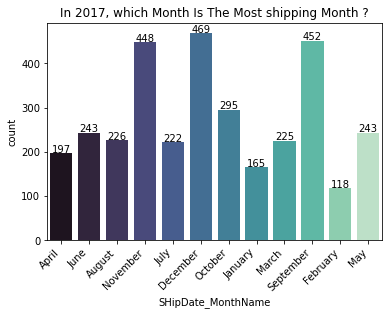

In [23]:

fig=sns.countplot(data=two_seventy,x='SHipDate_MonthName',palette='mako')
plt.title('In 2017, which Month Is The Most shipping Month ?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

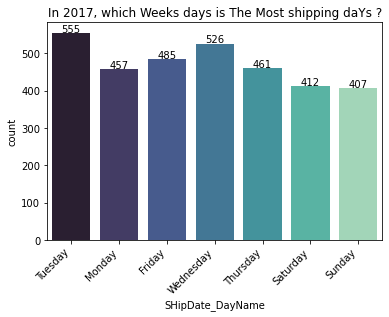

In [24]:
fig=sns.countplot(data=two_seventy,x='SHipDate_DayName',palette='mako')
plt.title('In 2017, which Weeks days is The Most shipping daYs ?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

Tuesday: is The Most Shipping days in 2017

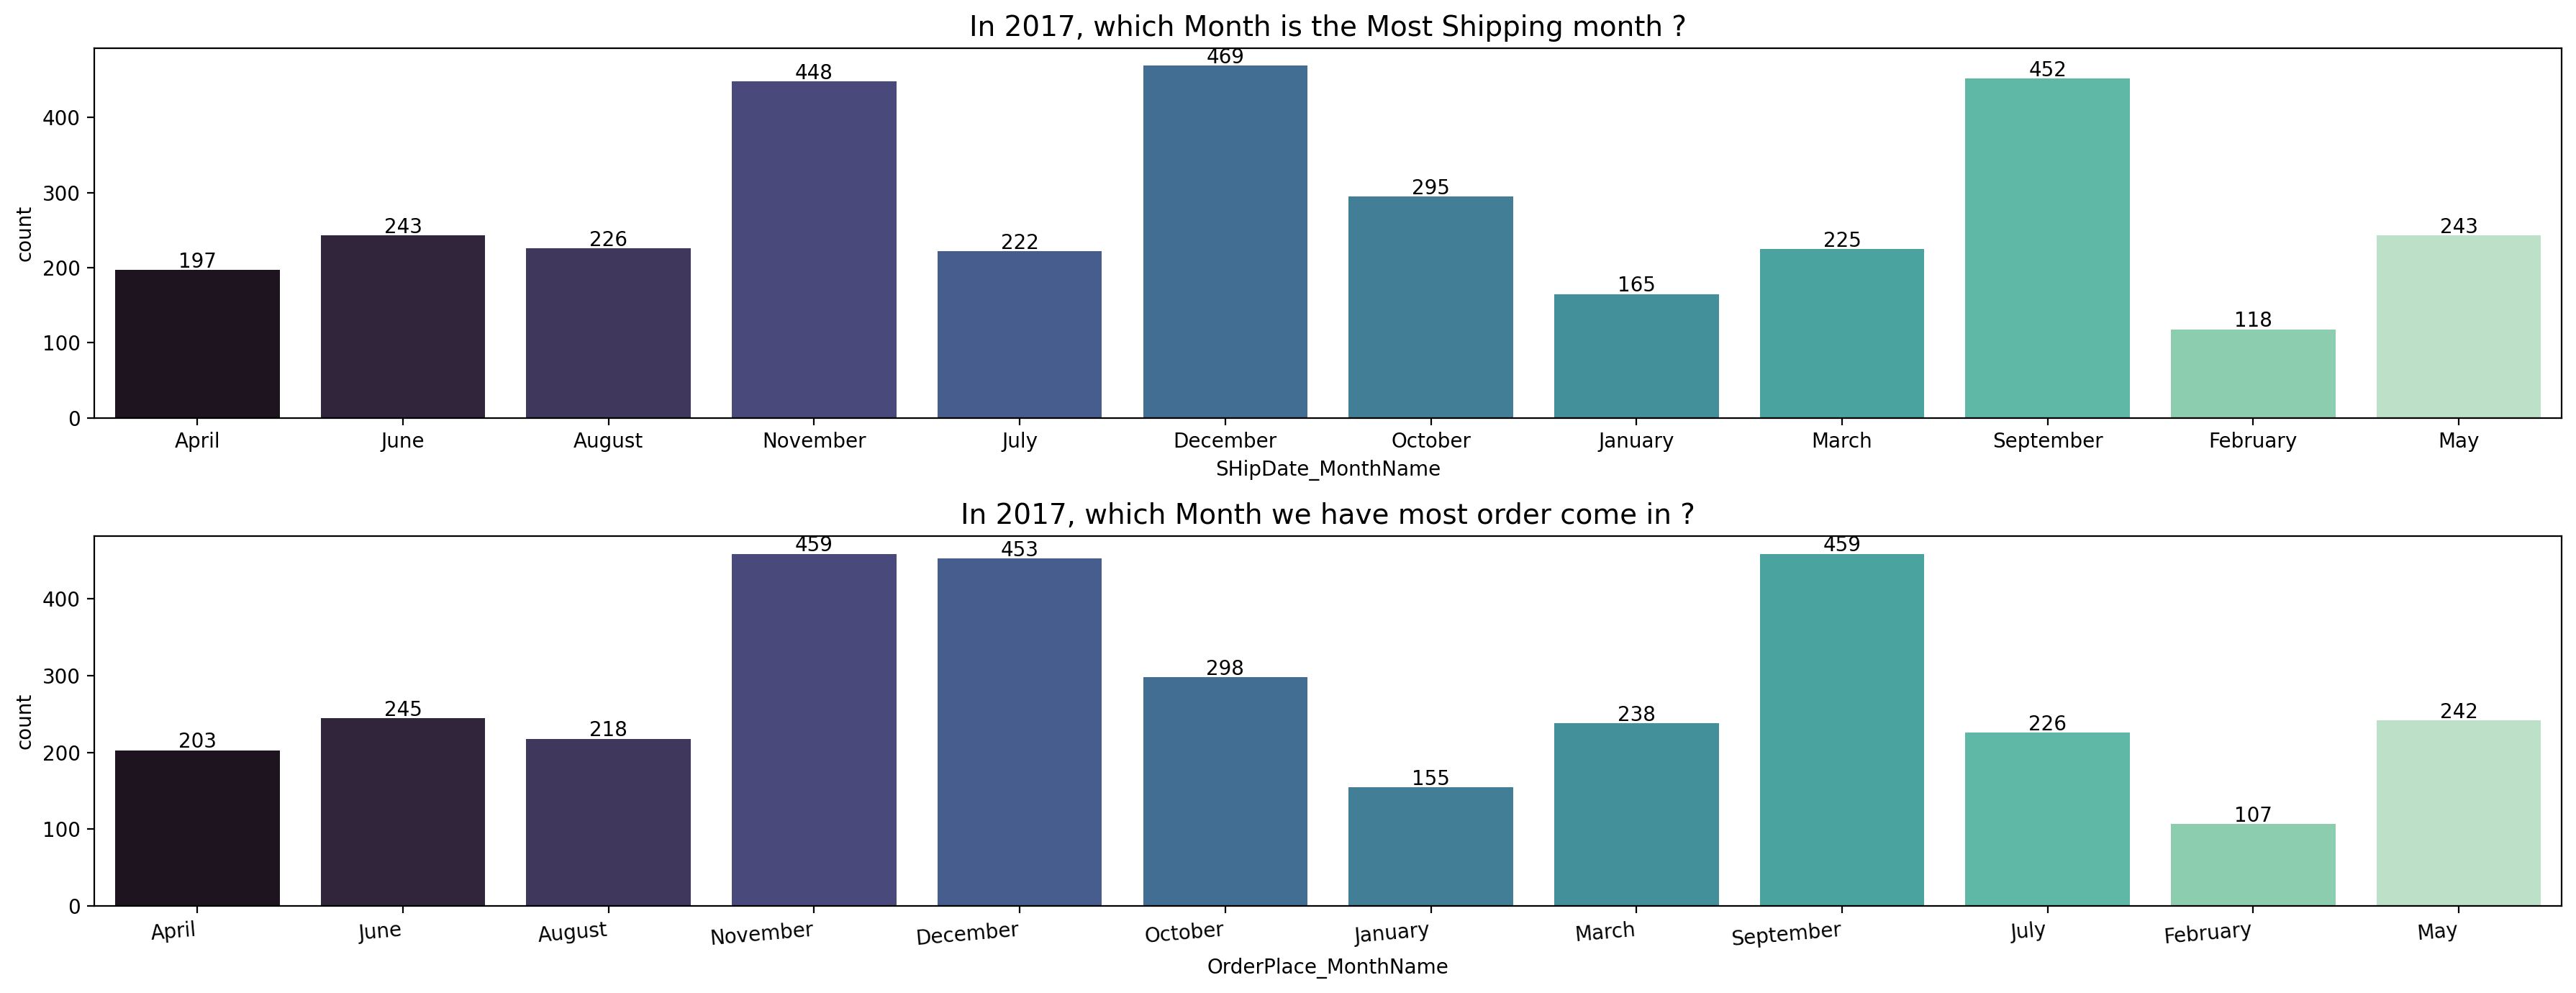

In [104]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.countplot(data=two_seventy,x='SHipDate_MonthName',palette='mako',ax=ax[0])
ax[0].set_title('In 2017, which Month is the Most Shipping month ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.countplot(data=two_seventy,x='OrderPlace_MonthName',palette='mako',ax=ax[1])
ax[1].set_title('In 2017, which Month we have most order come in ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

SHIPPING AND ORDER BY MONTH:

Most shipping Month was in December,september and November in 2017

Most Ordering Month in 2017 was September and November 


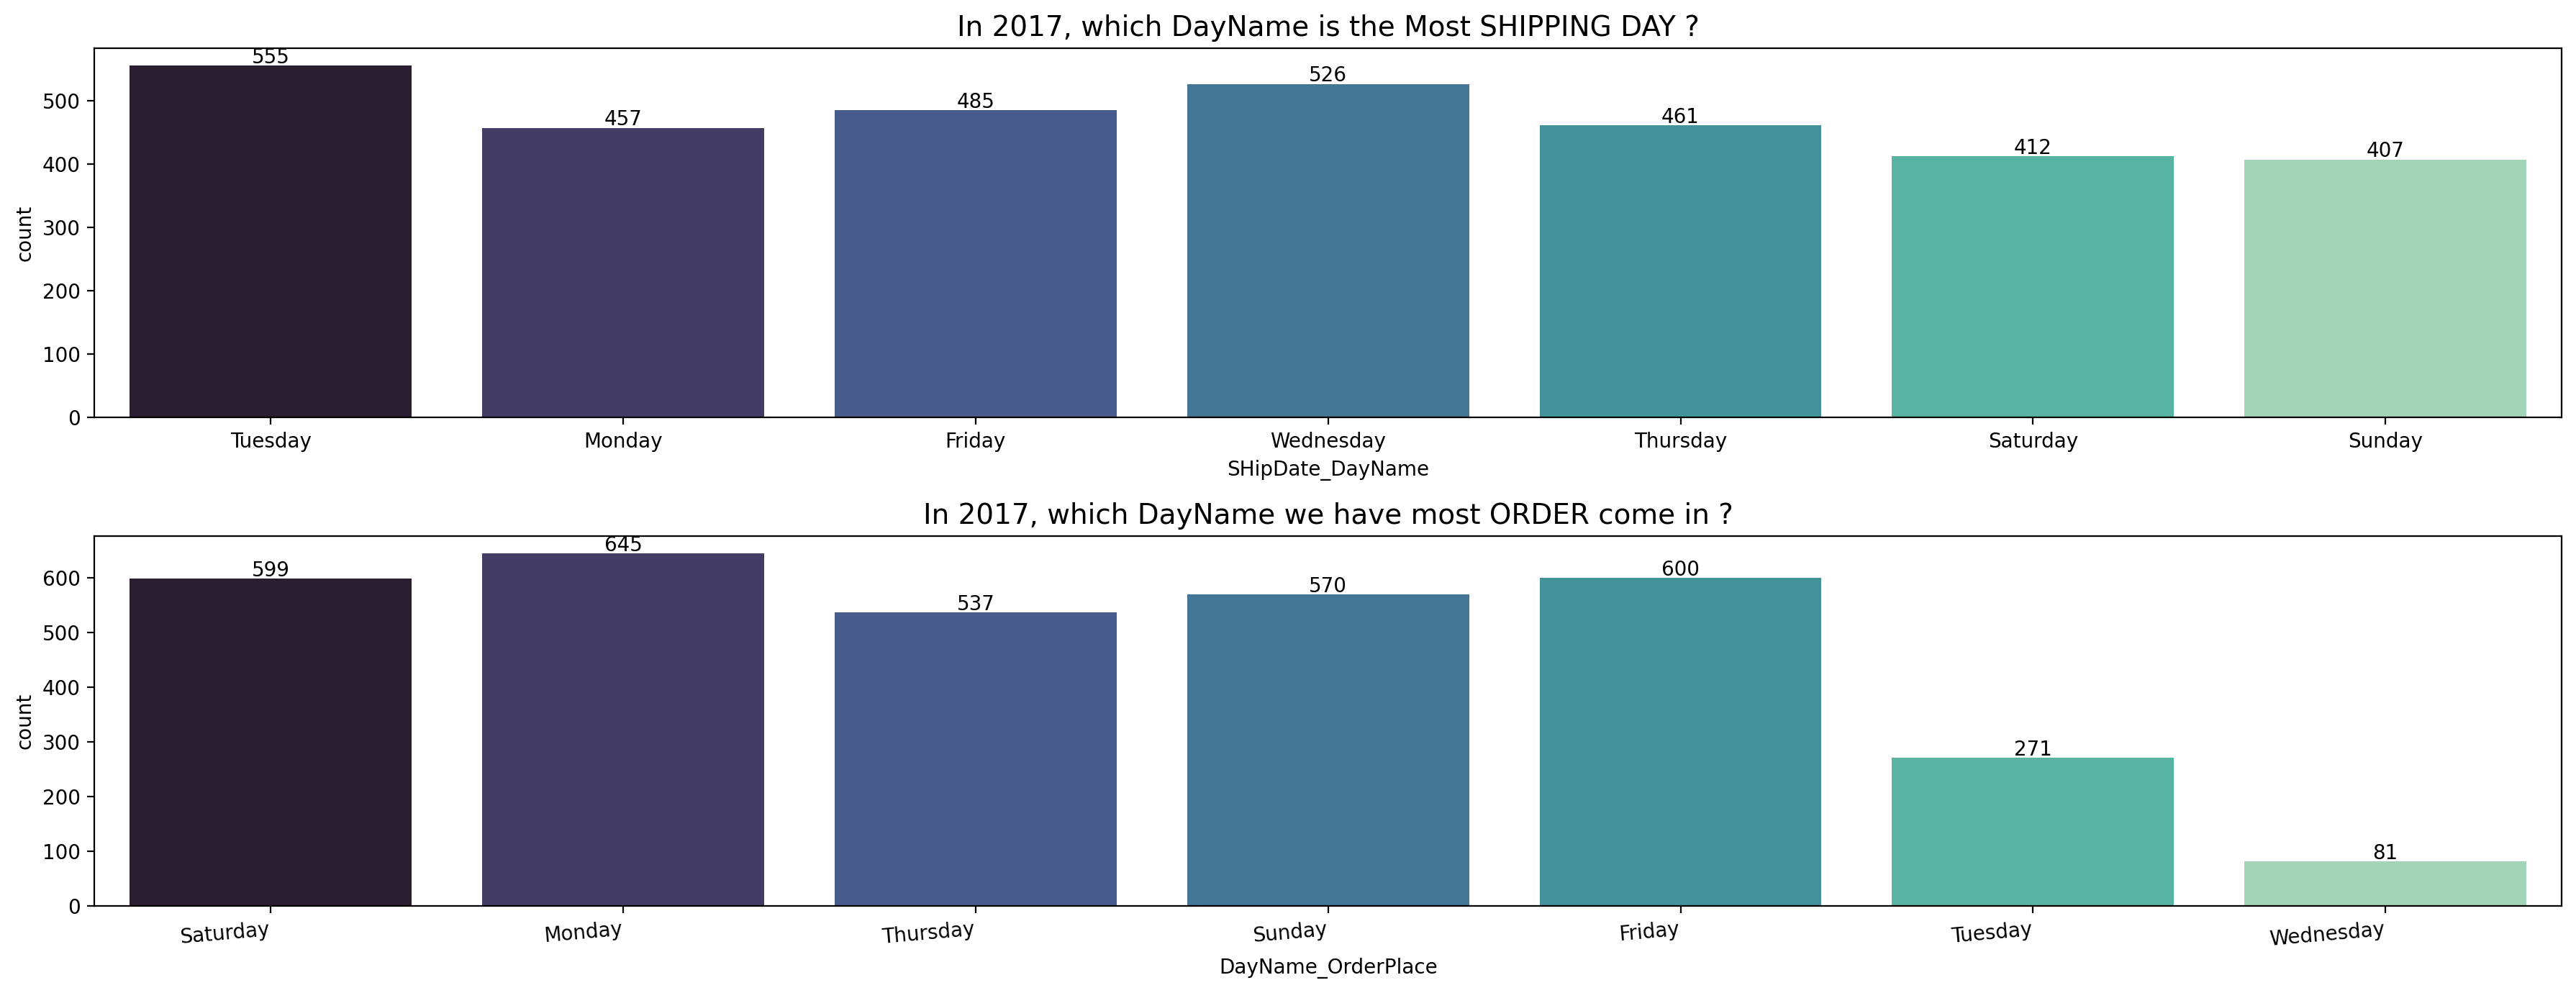

In [107]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.countplot(data=two_seventy,x='SHipDate_DayName',palette='mako',ax=ax[0])
ax[0].set_title('In 2017, which DayName is the Most SHIPPING DAY ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.countplot(data=two_seventy,x='DayName_OrderPlace',palette='mako',ax=ax[1])
ax[1].set_title('In 2017, which DayName we have most ORDER come in ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

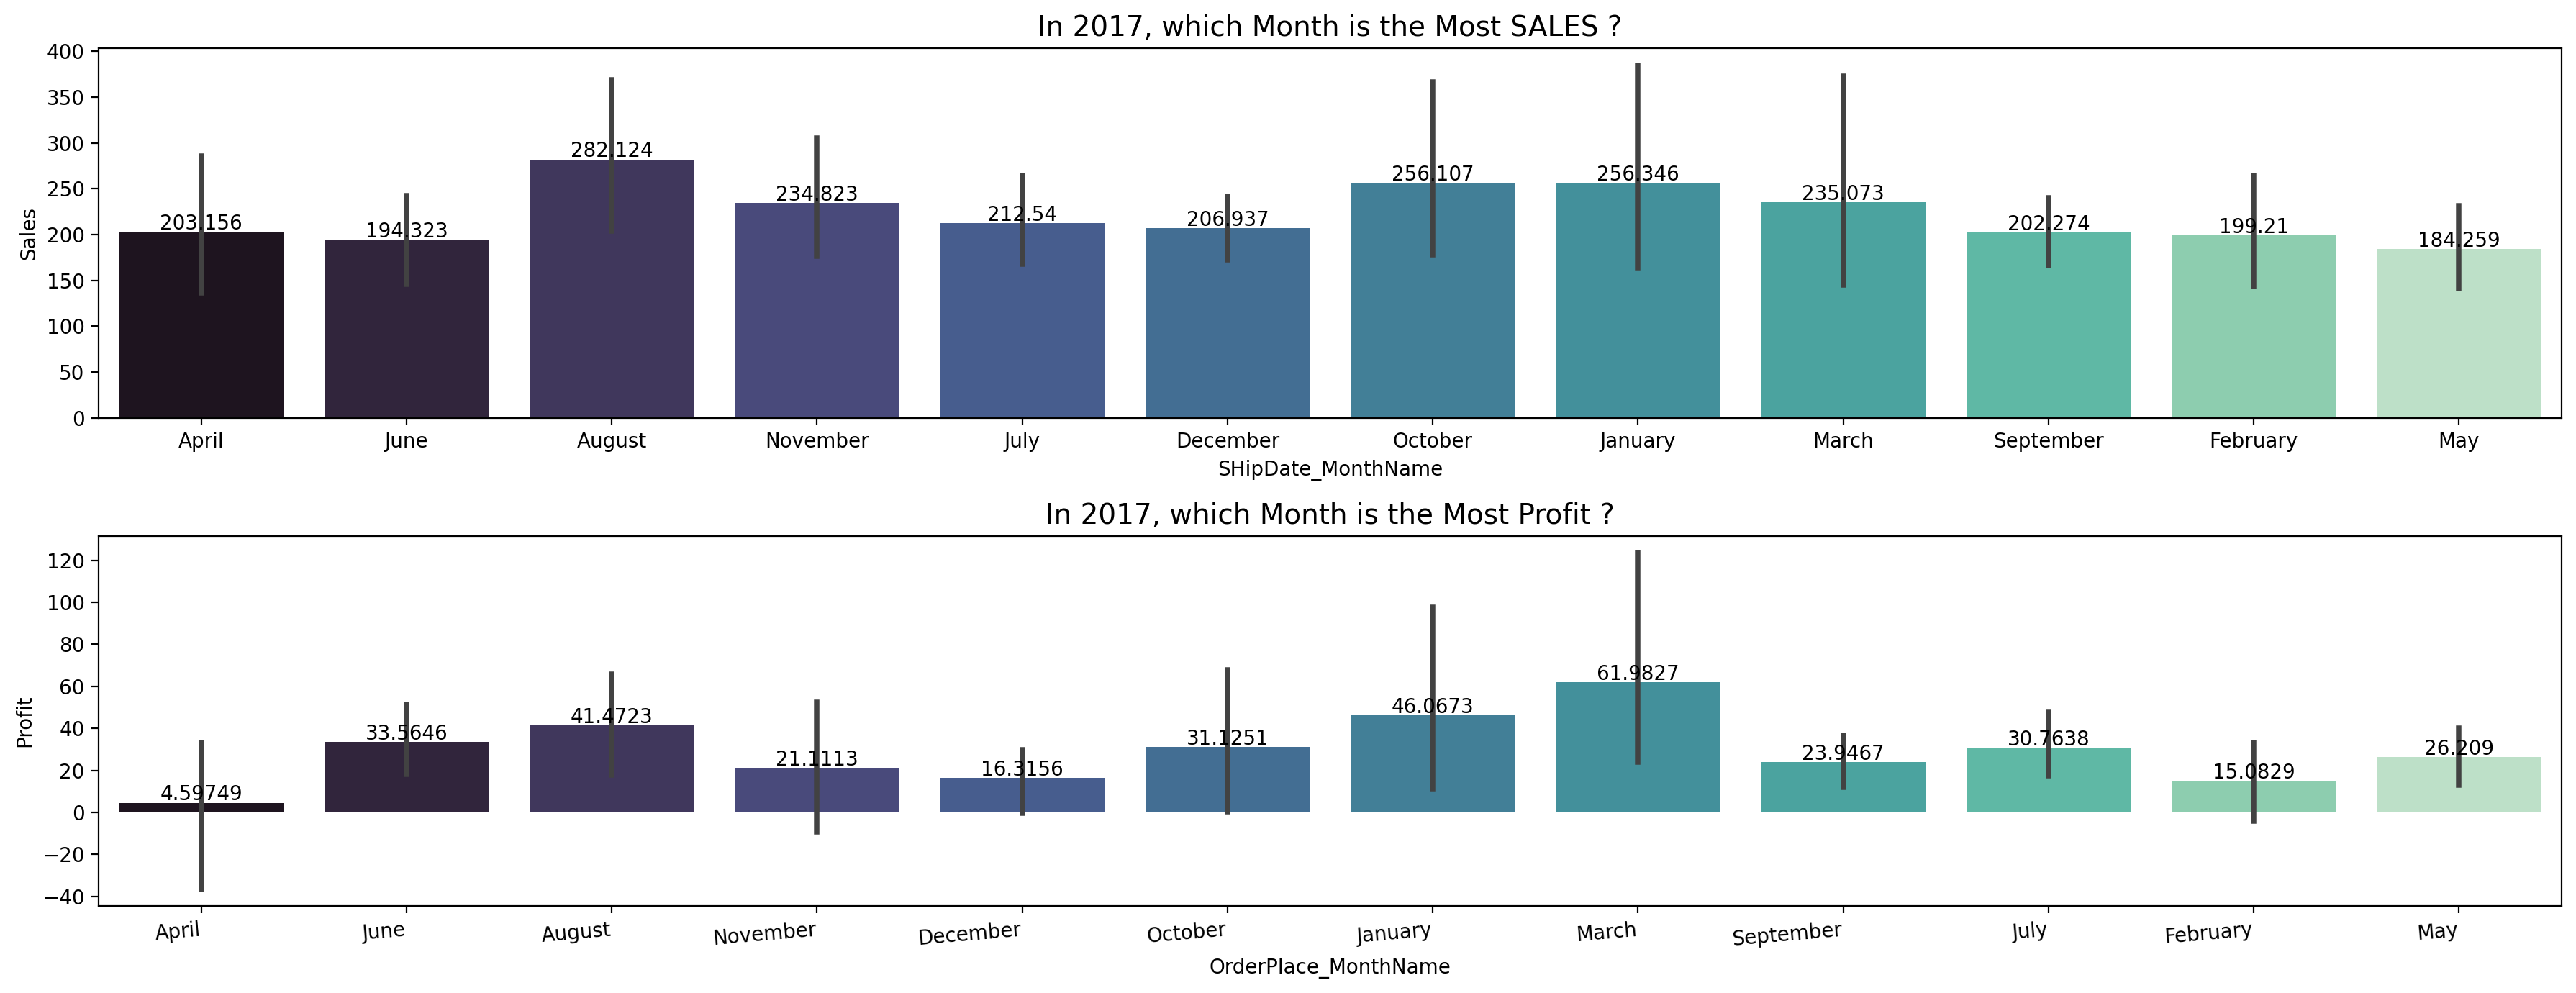

In [122]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.barplot(data=two_seventy,x='SHipDate_MonthName',y='Sales',palette='mako',ax=ax[0])
ax[0].set_title('In 2017, which Month is the Most SALES ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.barplot(data=two_seventy,x='OrderPlace_MonthName',y='Profit',palette='mako',ax=ax[1])
ax[1].set_title('In 2017, which Month is the Most Profit ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

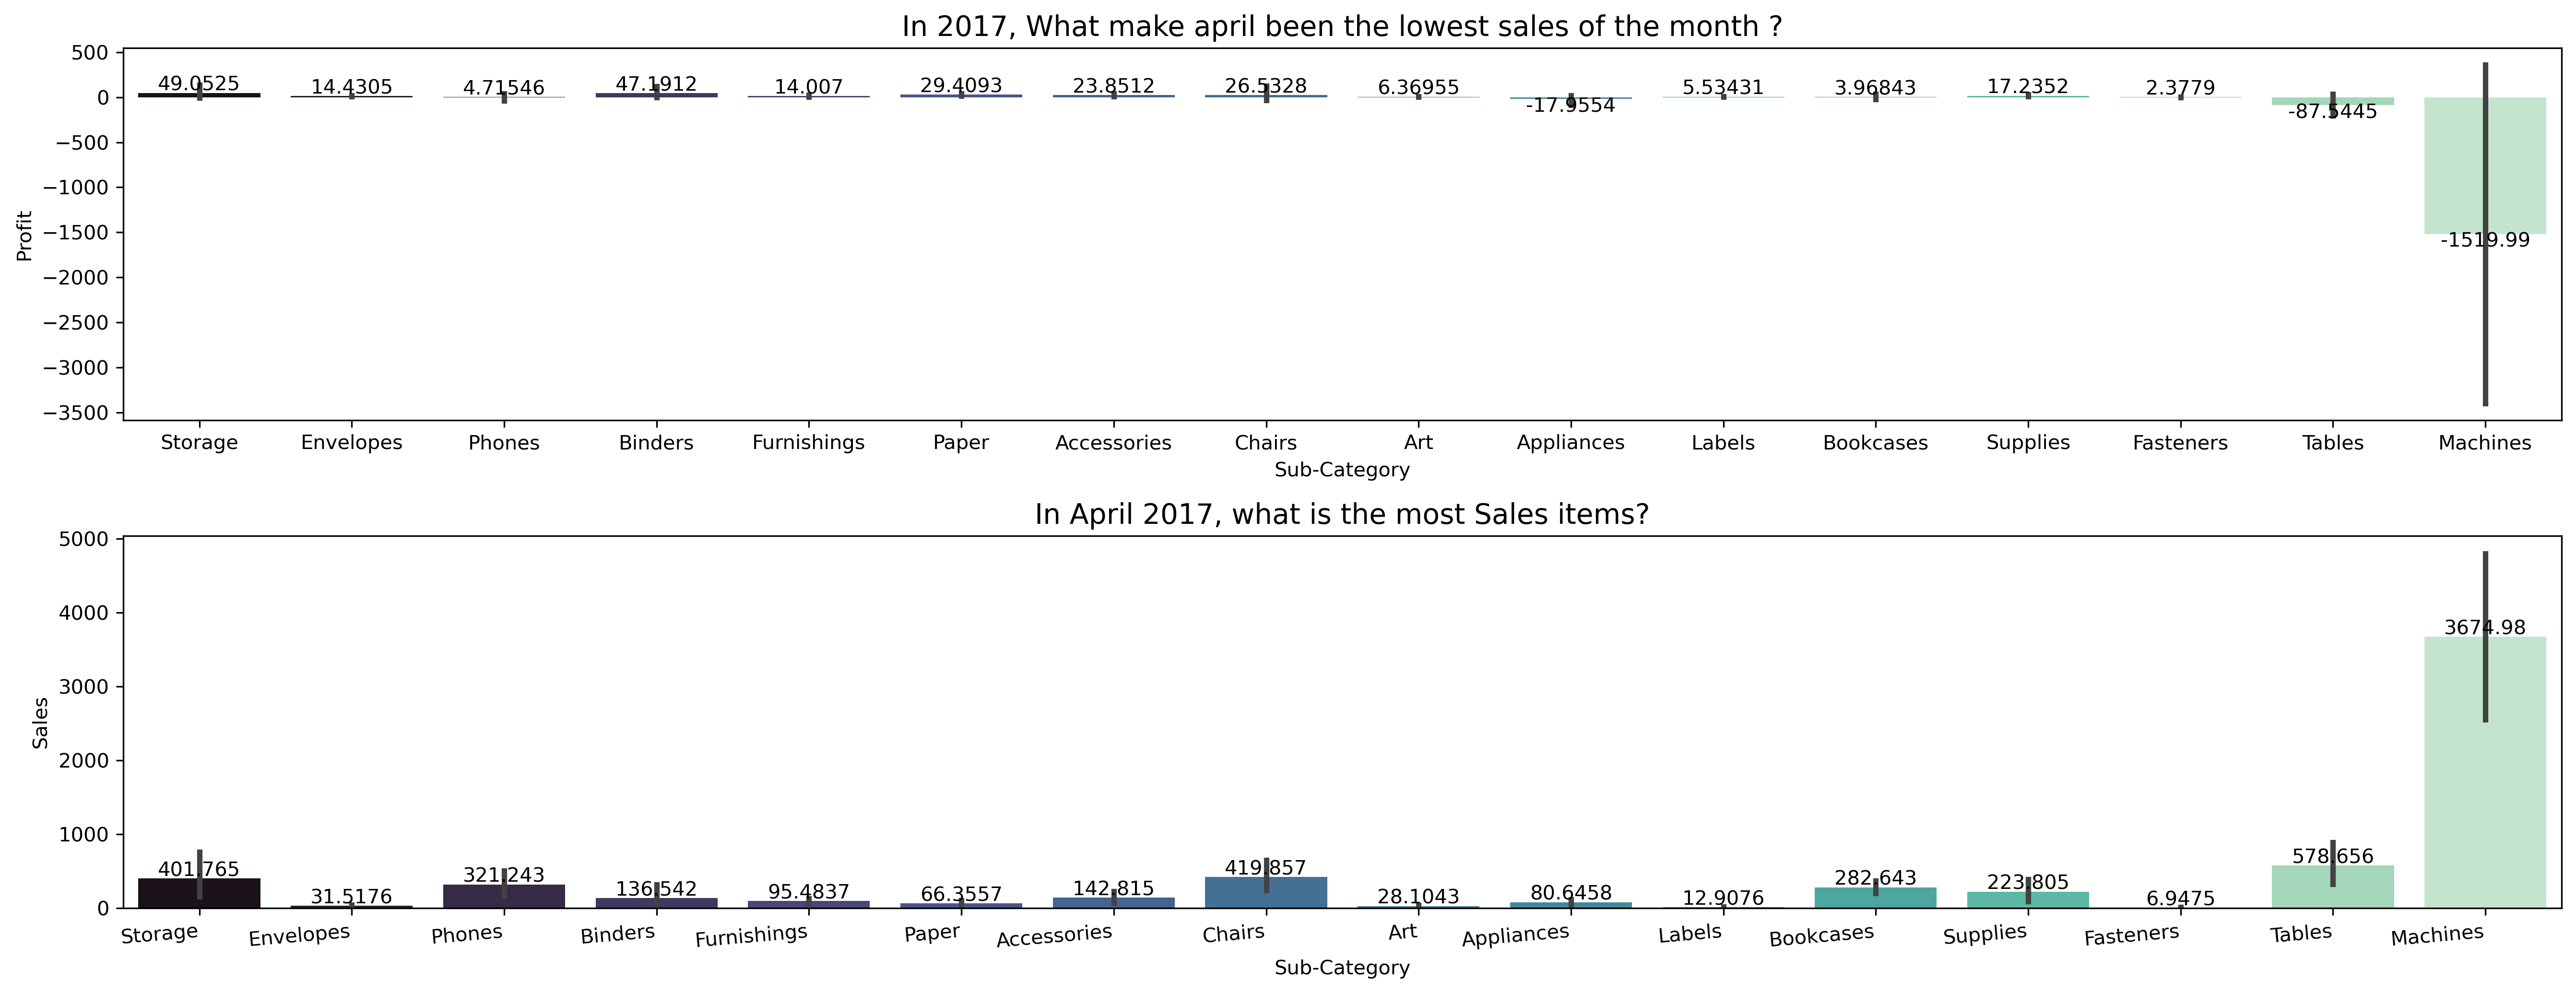

In [143]:
#WHY IS APRIL BEEN TH LOWEST PROFIT OF THE MONTH ?

april=two_seventy[two_seventy['OrderPlace_MonthName']=='April']

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=300)
figg=sns.barplot(data=april,x='Sub-Category',y='Profit',palette='mako',ax=ax[0])
ax[0].set_title('In 2017, What make april been the lowest sales of the month ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

figg=sns.barplot(data=april,x='Sub-Category',y='Sales',palette='mako',ax=ax[1])
ax[1].set_title('In April 2017, what is the most Sales items?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

BY ORDERING AND SHIPPING:
    
    TUESDAY IS THE MOST SHIPPING DAY.
    
    WHILE MONDAY IS THE MOST DAY ORDERS ARE TAKEN.
    
    AUGUST IS THe sALES
    
    March is The MOst Profitable Month for the year 2017
    
    APRIL IS THE LOWEST PROFIT MARKET 
    
    THE MONTH OF APRIL IS WHEN WE AVE OUR MACHINE PRODUCT MOST RUNNING AT LOST.
    
    MACHINE IS THE MOST SALES ITEM IN APRIL 2017 AND ALSO THE MOST RUNNING LOST ITEM. 

# Analysis BY Geographical Market Zone in 2017

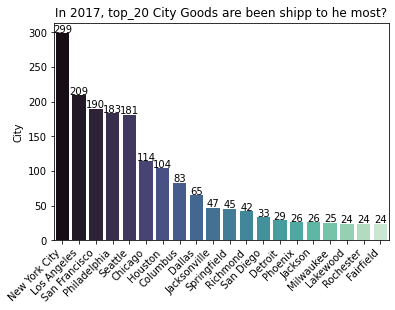

In [26]:
top_20=two_seventy['City'].value_counts()[:20].to_frame()
fig=sns.barplot(x=top_20.index,y=top_20['City'],palette='mako')
plt.title('In 2017, top_20 City Goods are been shipp to he most?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

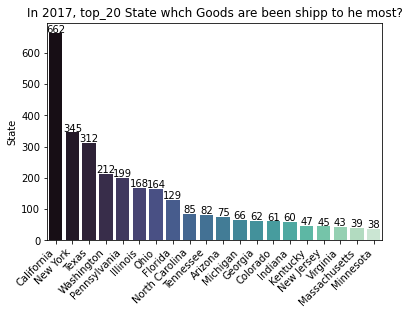

In [27]:
top_20=two_seventy['State'].value_counts()[:20].to_frame()
fig=sns.barplot(x=top_20.index,y=top_20['State'],palette='mako')
plt.title('In 2017, top_20 State whch Goods are been shipp to he most?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

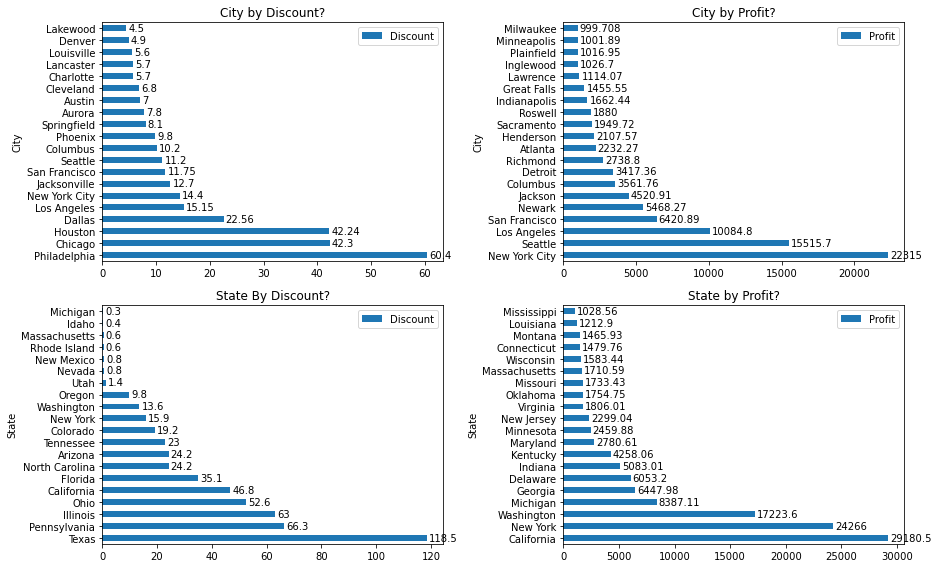

In [73]:
fig,ax=plt.subplots(2,2)
figg=two_seventy[['Discount','City']].groupby('City').sum().sort_values('Discount',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[0,0])
ax[0,0].set_title('City by Discount?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)
    
figg=two_seventy[['Profit','City']].groupby('City').sum().sort_values('Profit',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[0,1])
ax[0,1].set_title('City by Profit?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)
    
figg=two_seventy[['Discount','State']].groupby('State').sum().sort_values('Discount',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[1,0])
ax[1,0].set_title('State By Discount?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)
    
figg=two_seventy[['Profit','State']].groupby('State').sum().sort_values('Profit',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[1,1])
ax[1,1].set_title('State by Profit?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)

California Take Lead ahead of Newyork City

# Product By Sales

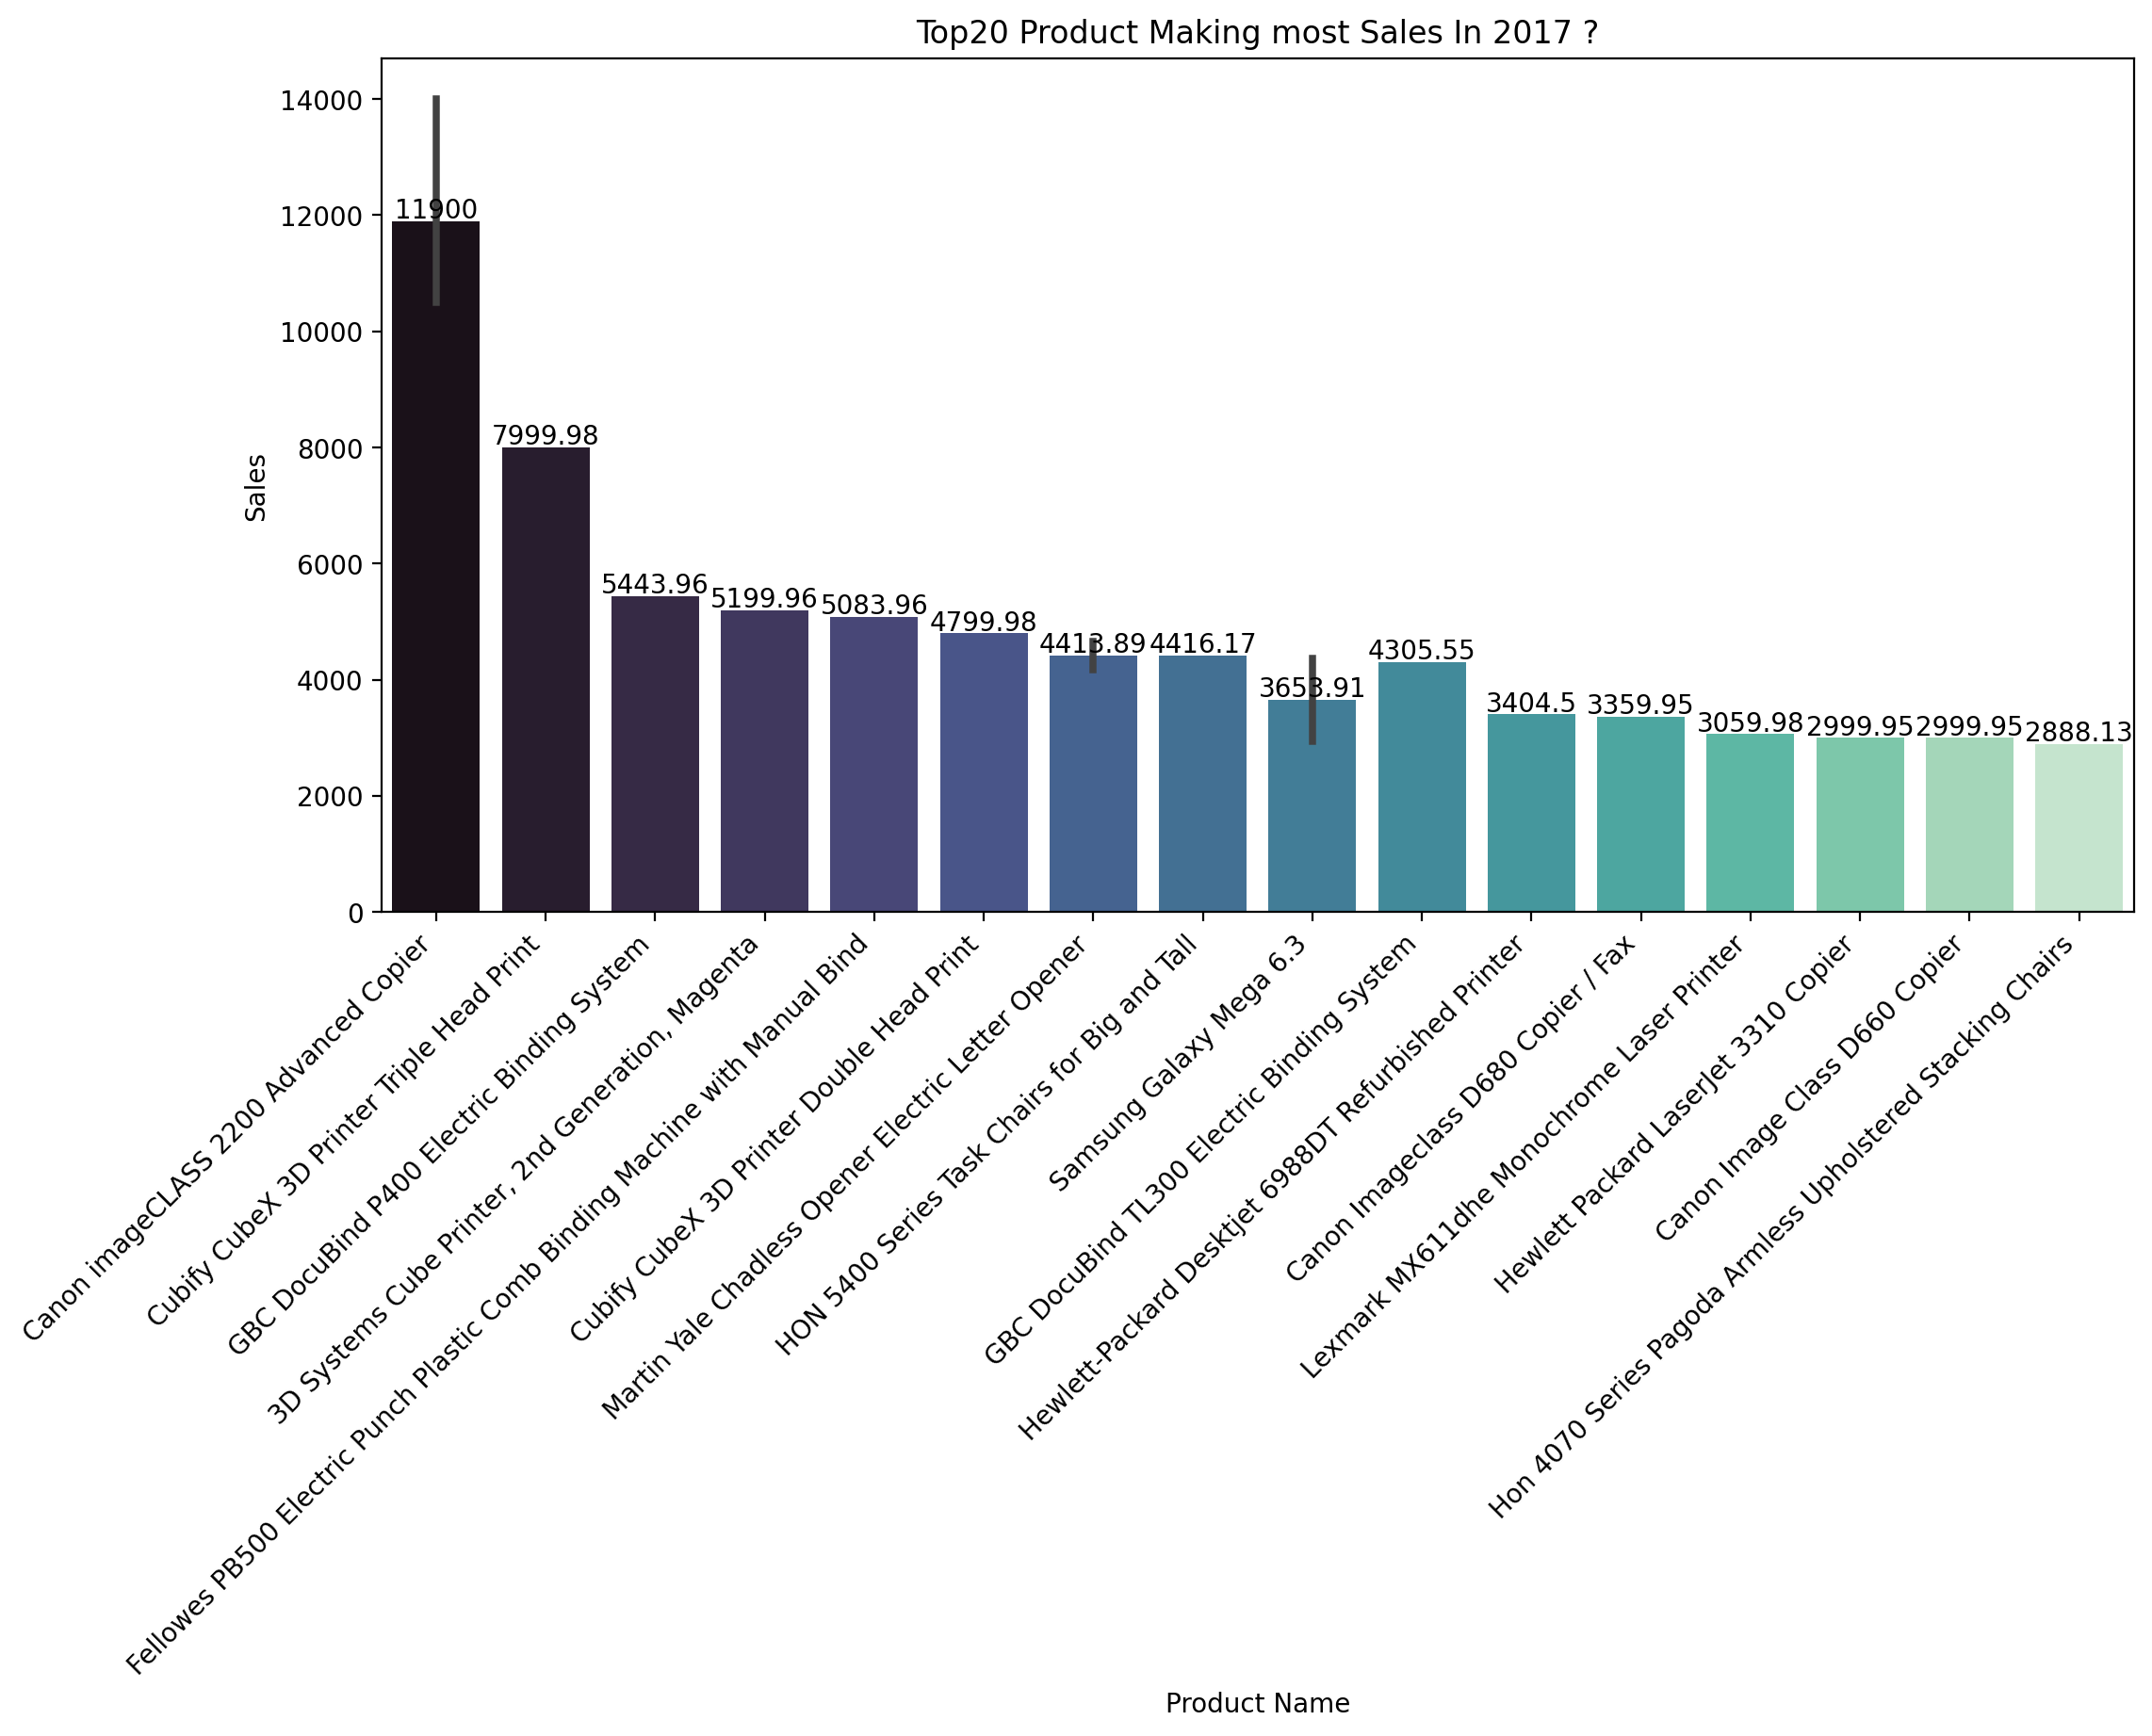

In [28]:
plt.figure(figsize=(12,6),dpi=200)
fig=sns.barplot(data=two_seventy.sort_values('Sales',ascending=False)[:20],x='Product Name',y='Sales',palette='mako')
plt.title('Top20 Product Making most Sales In 2017 ?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

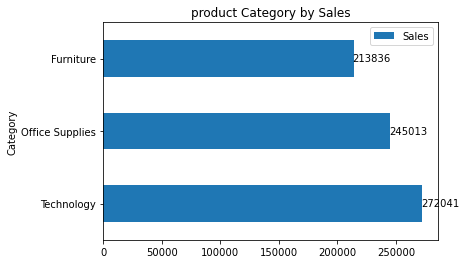

In [30]:
fig=two_seventy[['Product Name','Category','Sales']].groupby('Category').sum().sort_values('Sales',ascending=False).plot.barh()
plt.title('product Category by Sales')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

<Figure size 2400x1200 with 0 Axes>

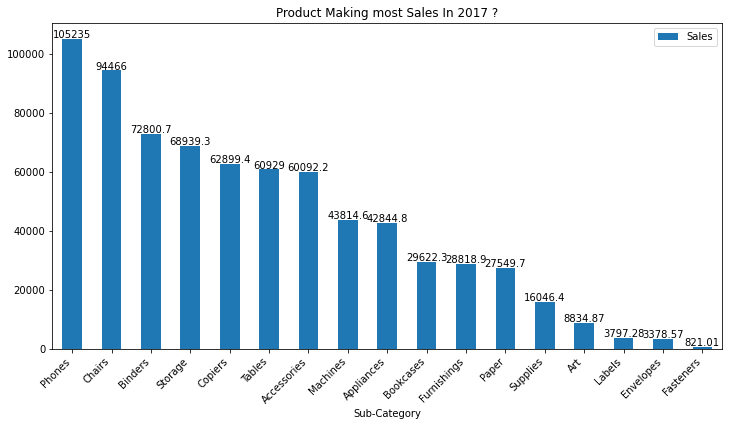

In [79]:
plt.figure(figsize=(12,6),dpi=200)
fig=two_seventy[['Sales','Sub-Category']].groupby('Sub-Category').sum().sort_values('Sales',ascending=False).plot(kind='bar',figsize=(12,6))
plt.title('Product Making most Sales In 2017 ?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

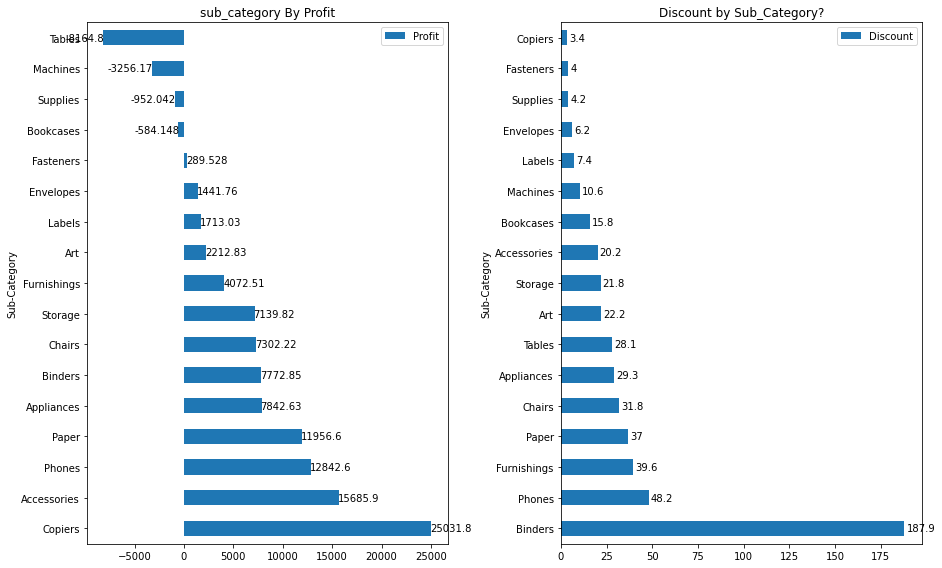

In [78]:
fig,ax=plt.subplots(1,2)
figg=two_seventy[['Profit','Sub-Category']].groupby('Sub-Category').sum().sort_values('Profit',ascending=False).plot.barh(figsize=(13,8),ax=ax[0])
ax[0].set_title('sub_category By Profit')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
figg=two_seventy[['Discount','Sub-Category']].groupby('Sub-Category').sum().sort_values('Discount',ascending=False).plot.barh(figsize=(13,8),ax=ax[1])
ax[1].set_title('Discount by Sub_Category?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)

#Product name (Table) given 28.1 discount rate, till yet we till running at lost ,which is the most lossing Rate product.

#product name (Binder) is the Most discount Goods and till yet is profit is low

#product Name (Copiers) is the profitable goods and the discount level is verylow.

#product Name (Phones) is the most Sales Item in our product The Most Sales Product is Phones and also second most discount Items.

In [ ]:
December is the Most Shipping_Month in 2017:
    Out of the Week, Tuesday  is The most shippinG Days of The Weeks
    NewYork City Leading The most Shipping City
    California take the Lead In the Most state out of the State.
    product Name(Canon Images advanced Copier) Making most Reveune In The 2017
    
    

# LET DIVE IN TO 2016

In [116]:
two_sixty=df[df['Year_Order']==2016]

In [117]:
two_sixty.head()

Row ID        Order ID Order Date Ship Date.1       Ship Mode Customer ID  \
1     8802  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
2     8803  CA-2016-140935 2016-11-10  2016-11-12     First Class    AB-10015   
9     6109  CA-2016-150007 2016-09-11  2016-09-16  Standard Class    AS-10090   
10    6110  CA-2016-150007 2016-09-11  2016-09-16  Standard Class    AS-10090   
11    7849  CA-2016-104311 2016-05-02  2016-05-06  Standard Class    AS-10090   

         Customer Name   Segment        Country           City  ...    Sales  \
1        Aaron Bergman  Consumer  United States  Oklahoma City  ...  221.980   
2        Aaron Bergman  Consumer  United States  Oklahoma City  ...  341.960   
9   Adam Shillingsburg  Consumer  United States        Chicago  ...    6.000   
10  Adam Shillingsburg  Consumer  United States        Chicago  ...    1.908   
11  Adam Shillingsburg  Consumer  United States         Irving  ...   18.936   

    Quantity Discount   Profit Year_Order DayName_OrderPlace  \
1          2      0.0  62.1544       2016           Thursday   
2          2      0.0  54.7136       2016           Thursday   
9          2      0.2   2.1000       2016             Sunday   
10         3      0.8  -3.2436       2016             Sunday   
11         3      0.2  -3.7872       2016             Monday   

   OrderPlace_MonthName  SHipDate_DayName  SHipDate_Year  SHipDate_MonthName  
1              November          Saturday           2016            November  
2              November          Saturday           2016            November  
9             September            Friday           2016           September  
10            September            Friday           2016           September  
11                  May            Friday           2016                 May  

[5 rows x 27 columns]

# 2016 Analysis.

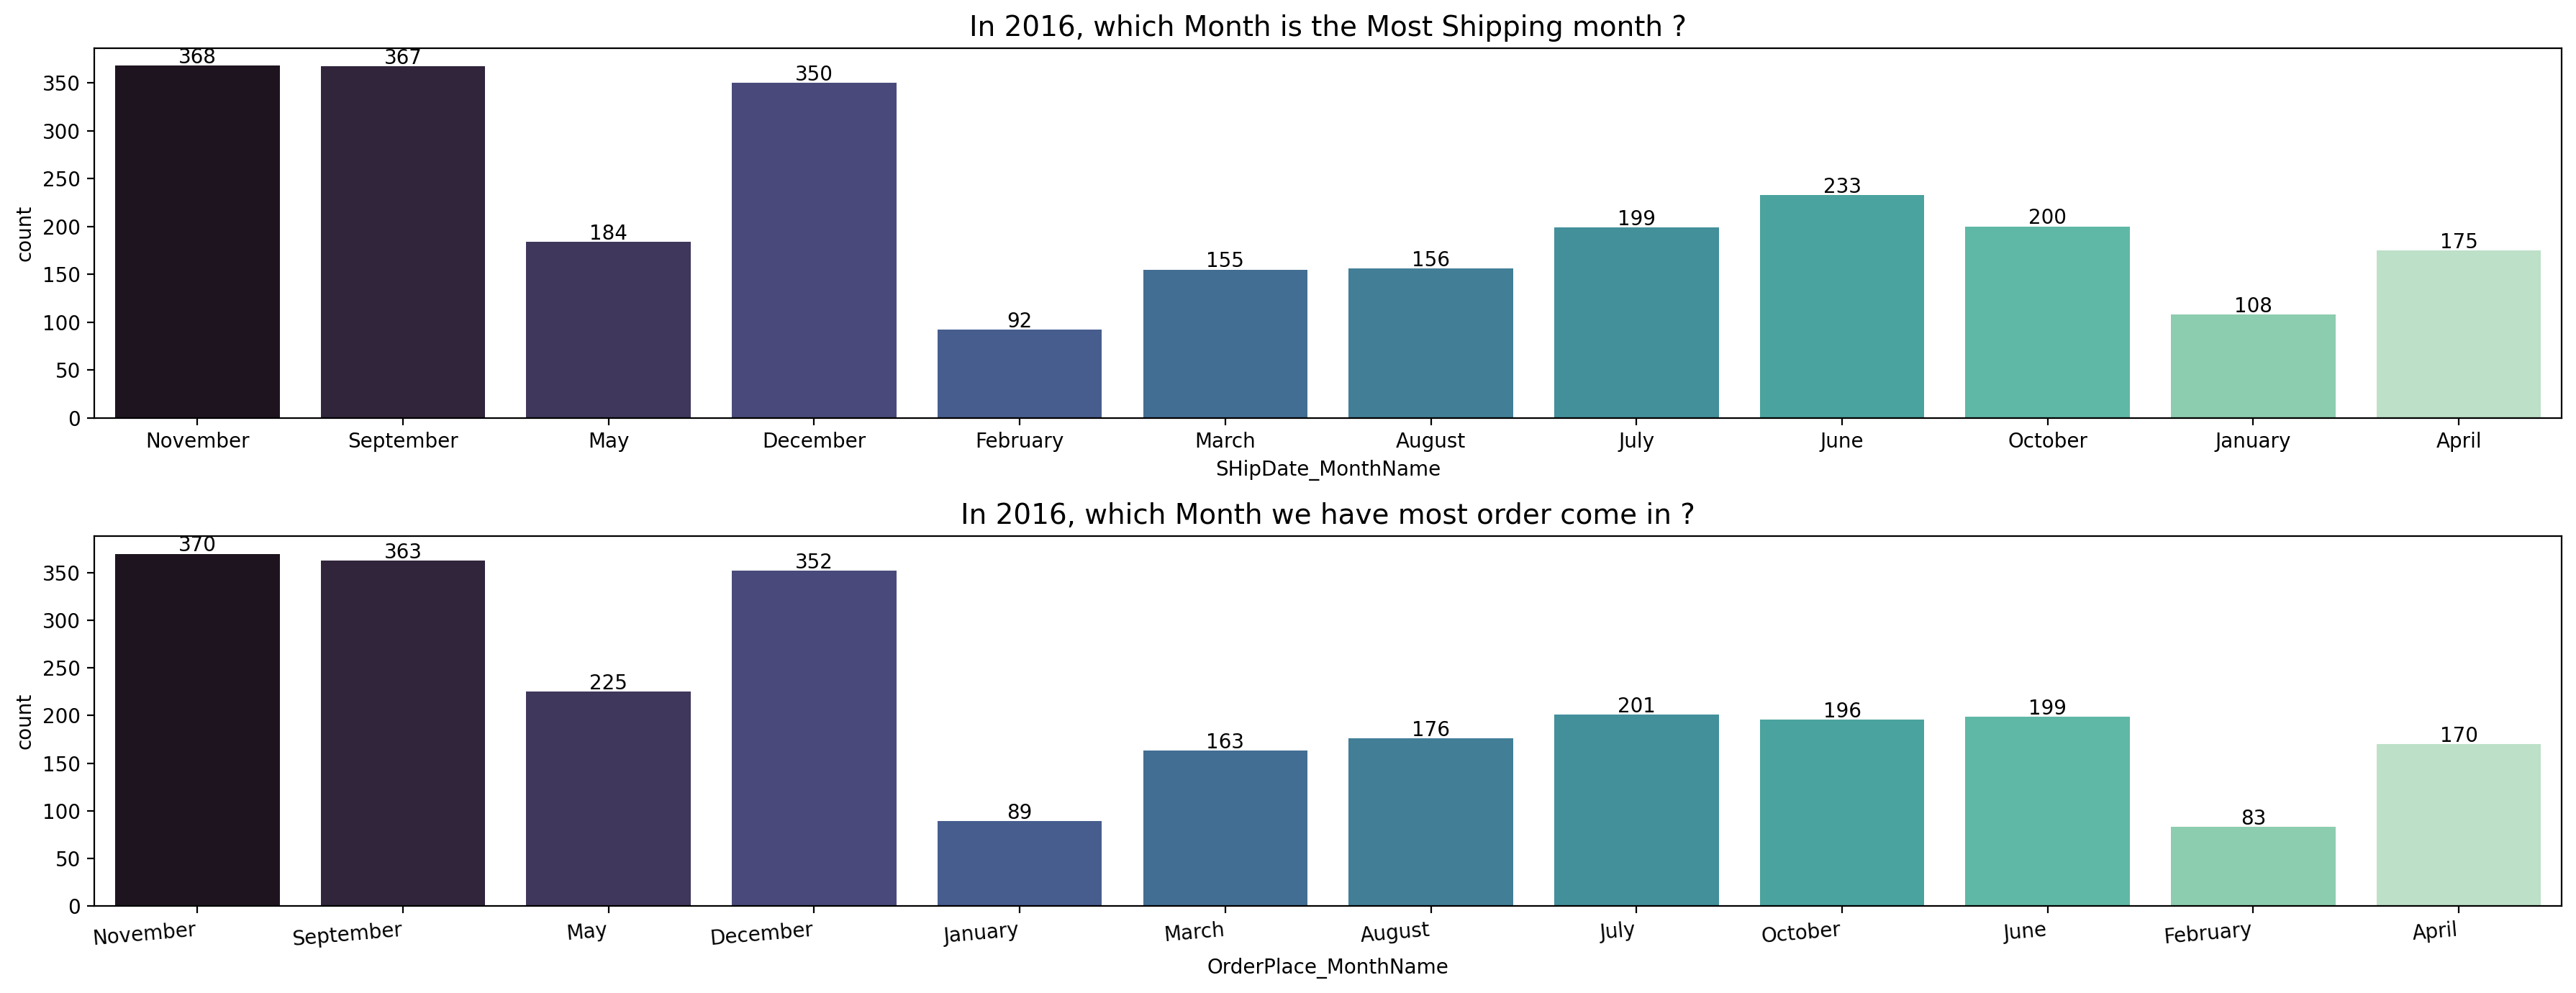

In [123]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.countplot(data=two_sixty,x='SHipDate_MonthName',palette='mako',ax=ax[0])
ax[0].set_title('In 2016, which Month is the Most Shipping month ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.countplot(data=two_sixty,x='OrderPlace_MonthName',palette='mako',ax=ax[1])
ax[1].set_title('In 2016, which Month we have most order come in ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

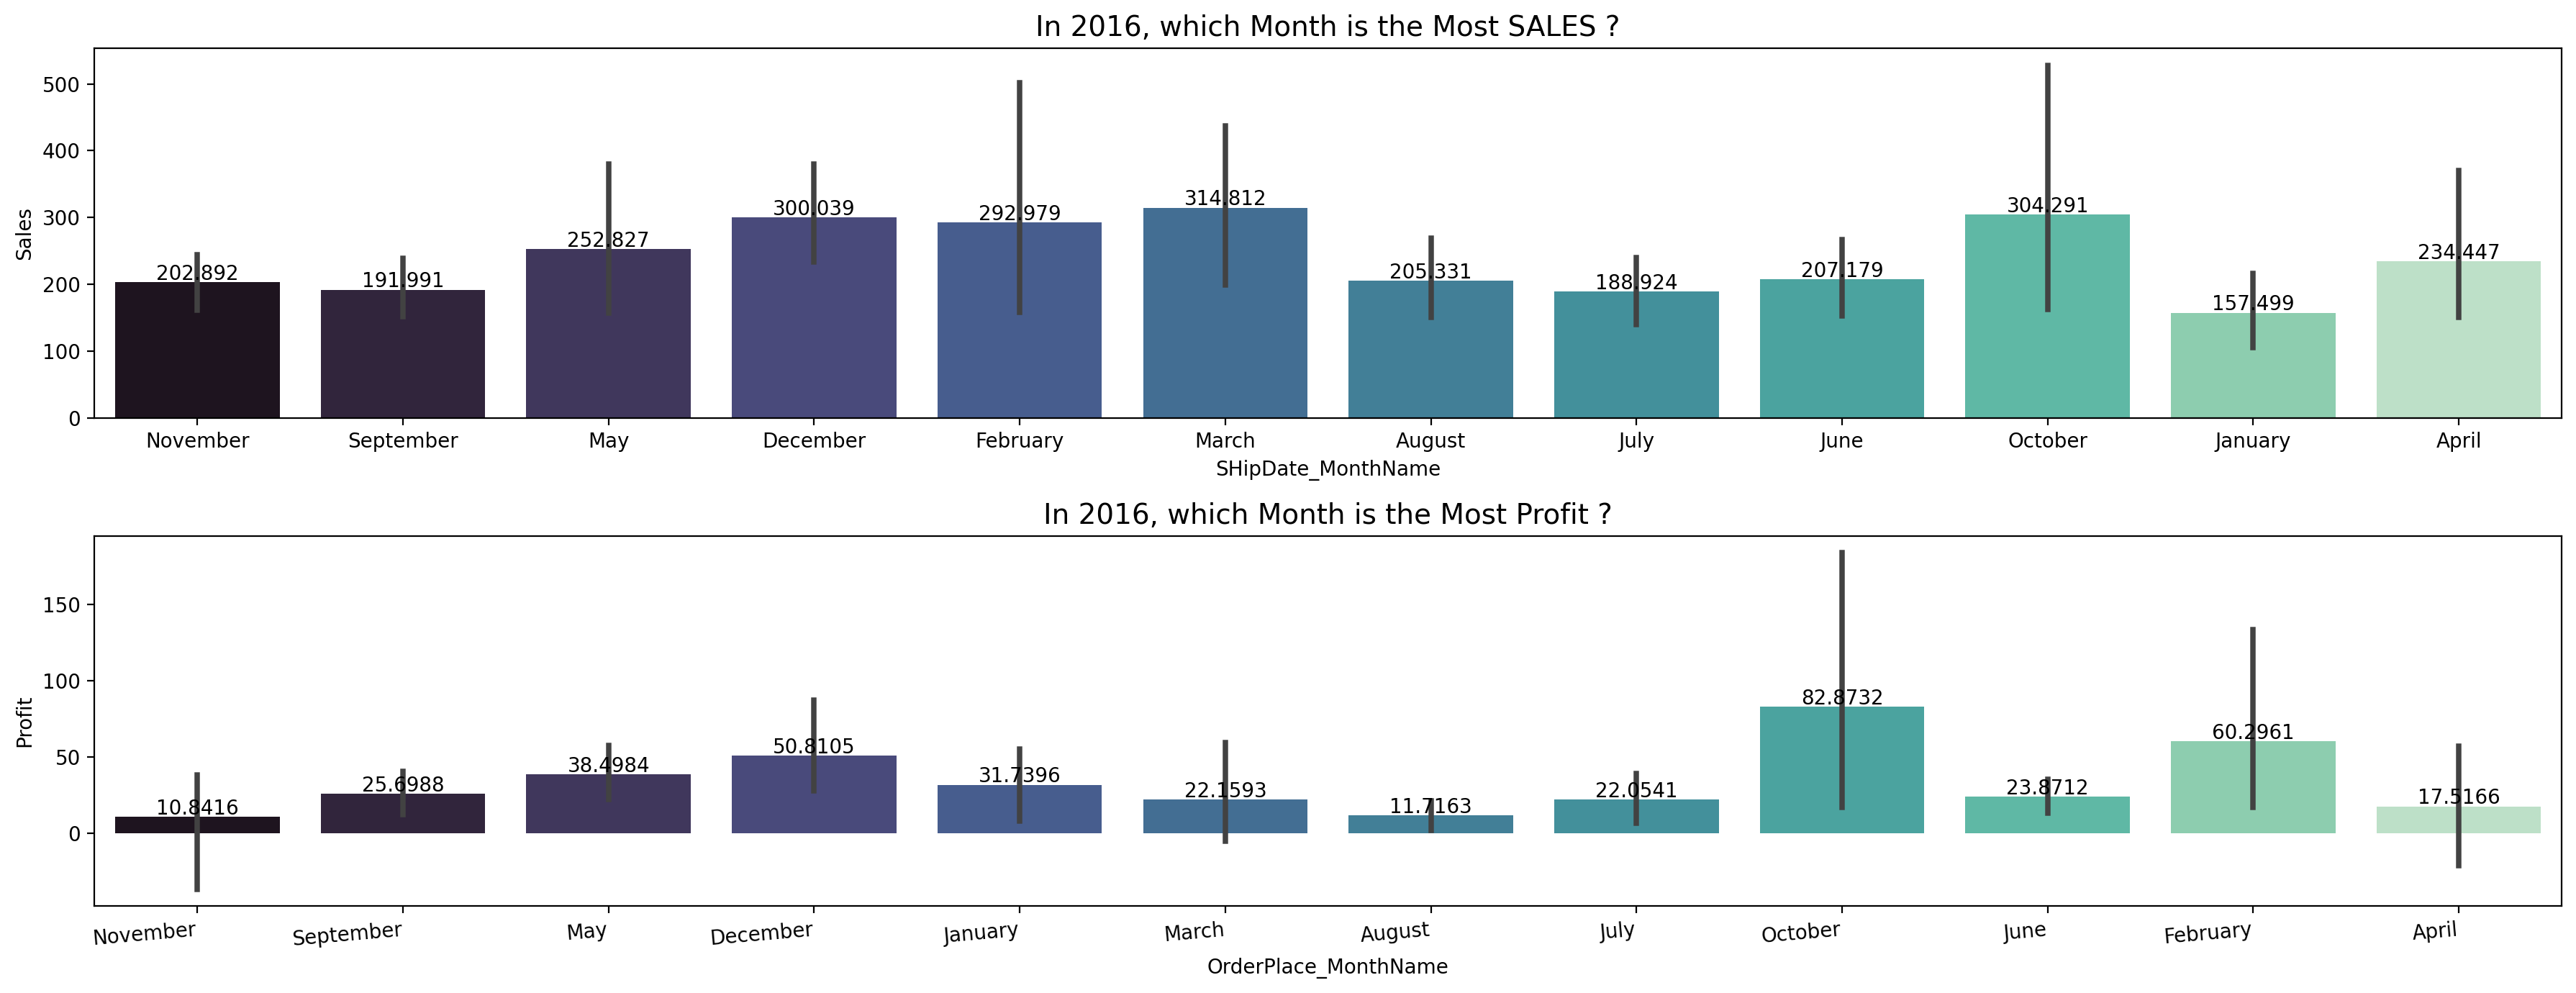

In [125]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.barplot(data= two_sixty,x='SHipDate_MonthName',y='Sales',palette='mako',ax=ax[0])
ax[0].set_title('In 2016, which Month is the Most SALES ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.barplot(data= two_sixty,x='OrderPlace_MonthName',y='Profit',palette='mako',ax=ax[1])
ax[1].set_title('In 2016, which Month is the Most Profit ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

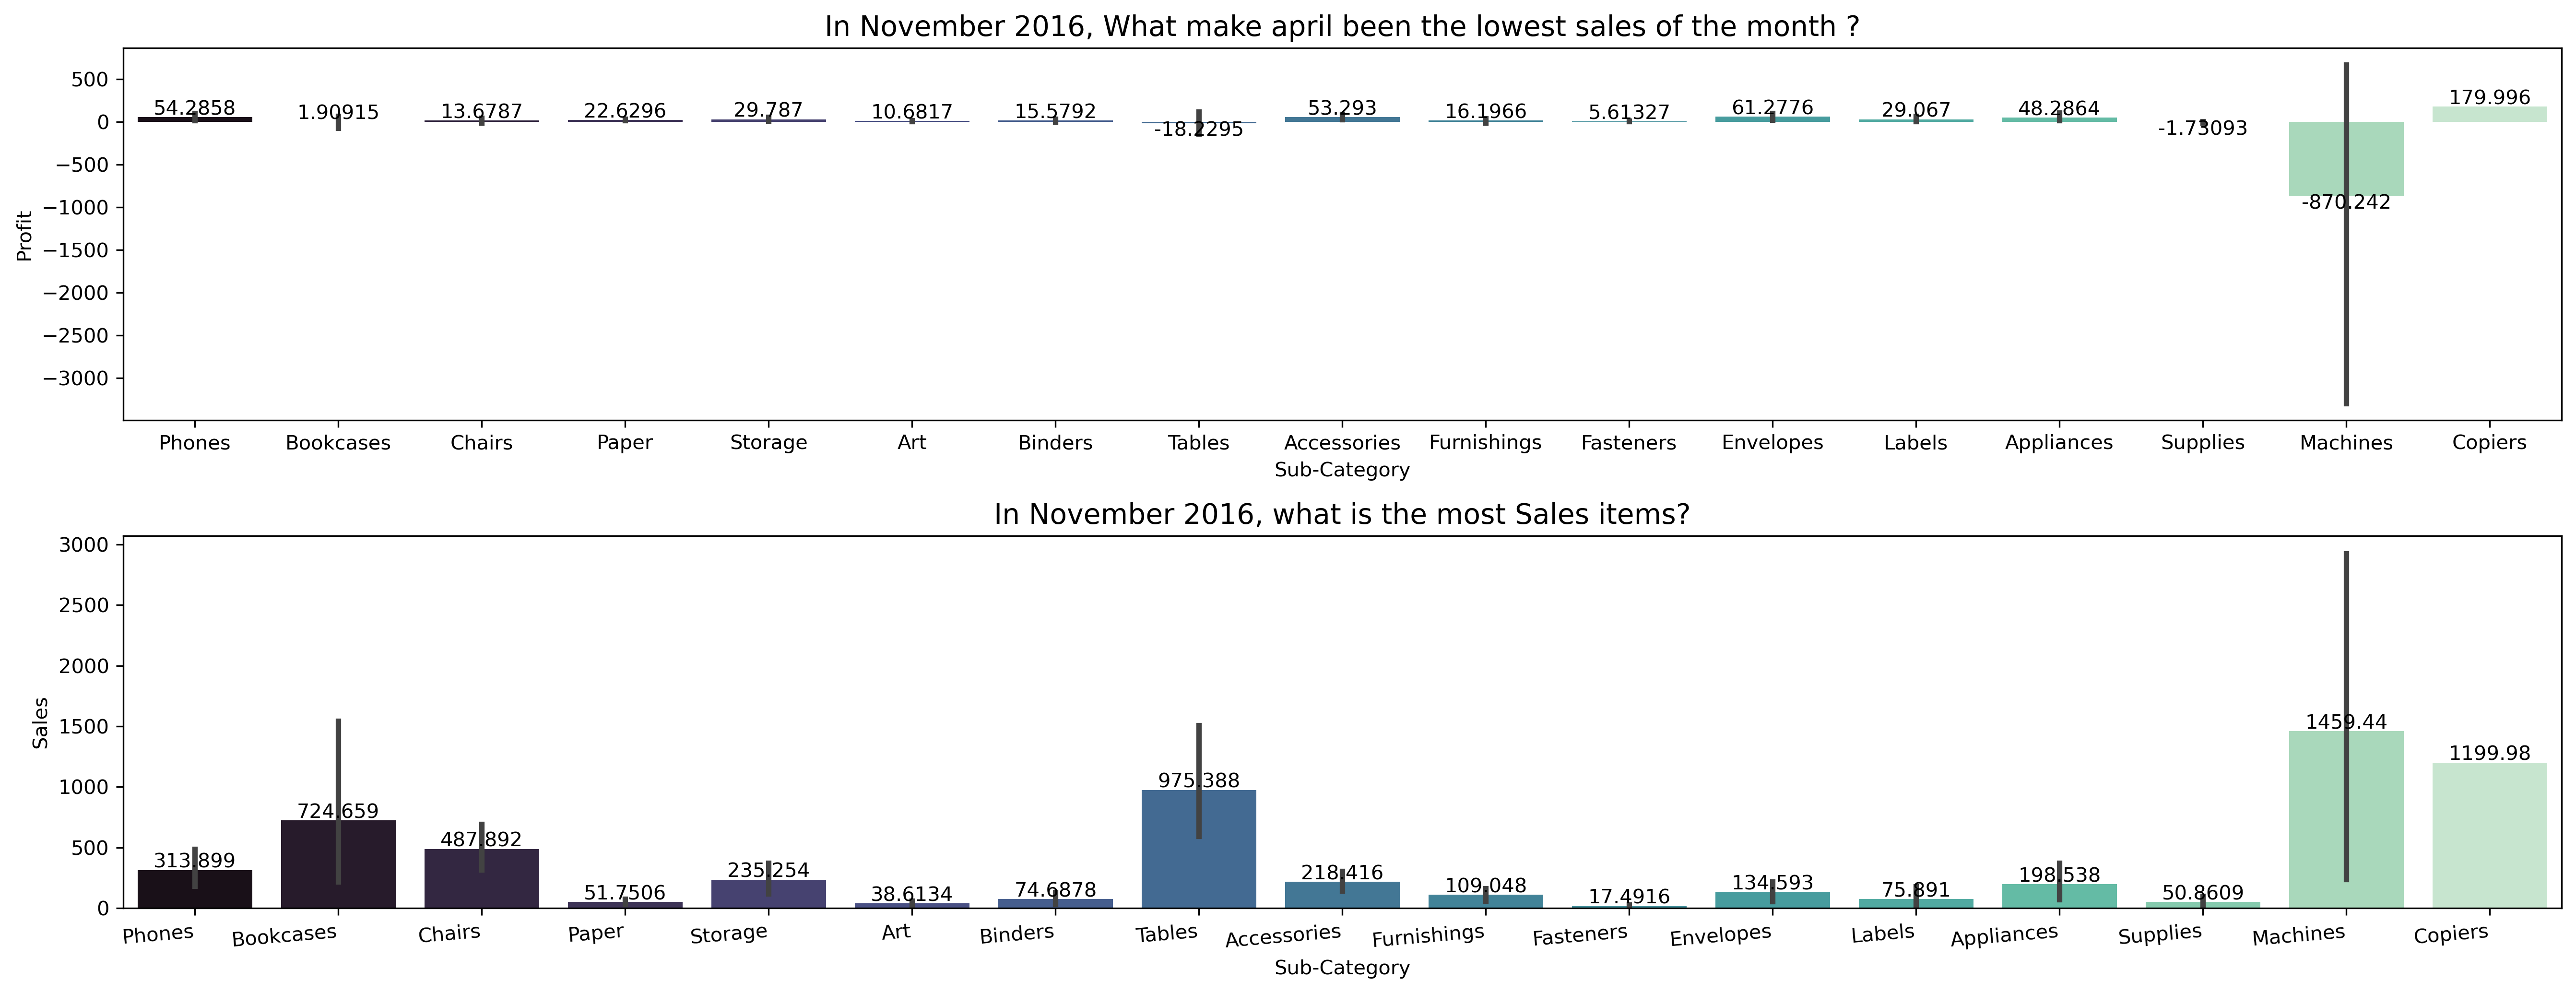

In [145]:
#WHY IS NOVEMBER THE LEAST PROFIT MARKET SALES?


november=two_sixty[two_sixty['OrderPlace_MonthName']=='November']

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=300)
figg=sns.barplot(data=november,x='Sub-Category',y='Profit',palette='mako',ax=ax[0])
ax[0].set_title('In November 2016, What make april been the lowest sales of the month ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

figg=sns.barplot(data=november,x='Sub-Category',y='Sales',palette='mako',ax=ax[1])
ax[1].set_title('In November 2016, what is the most Sales items?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

NOVEMBER WHICH IS THE LOWEST PROFIT RATE IN 2016,

MACHINE ALSO IS THE ITEMS DRAGIING THE COMPANY BACK WHICH IS MAKING THEM TO BE RUNNING AT LOST

AND ALSO IS THE MOST REQUESTED ITEM IN THE PRODUCT CATEGORY

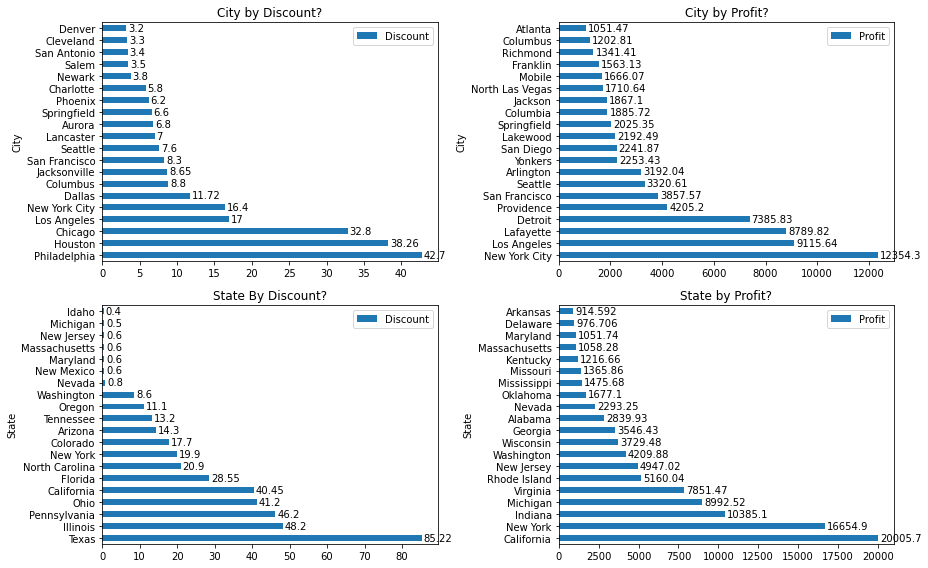

In [126]:
fig,ax=plt.subplots(2,2)
figg=two_sixty[['Discount','City']].groupby('City').sum().sort_values('Discount',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[0,0])
ax[0,0].set_title('City by Discount?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)
    
figg=two_sixty[['Profit','City']].groupby('City').sum().sort_values('Profit',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[0,1])
ax[0,1].set_title('City by Profit?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)
    
figg=two_sixty[['Discount','State']].groupby('State').sum().sort_values('Discount',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[1,0])
ax[1,0].set_title('State By Discount?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)
    
figg=two_sixty[['Profit','State']].groupby('State').sum().sort_values('Profit',ascending=False)[:20].plot.barh(figsize=(13,8),ax=ax[1,1])
ax[1,1].set_title('State by Profit?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)

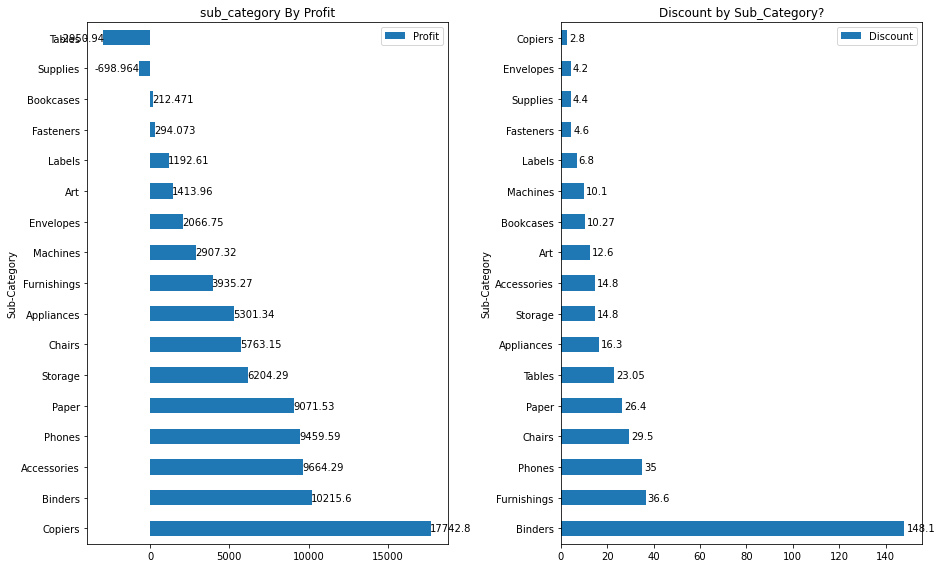

In [127]:
fig,ax=plt.subplots(1,2)
figg=two_sixty[['Profit','Sub-Category']].groupby('Sub-Category').sum().sort_values('Profit',ascending=False).plot.barh(figsize=(13,8),ax=ax[0])
ax[0].set_title('sub_category By Profit')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
figg=two_sixty[['Discount','Sub-Category']].groupby('Sub-Category').sum().sort_values('Discount',ascending=False).plot.barh(figsize=(13,8),ax=ax[1])
ax[1].set_title('Discount by Sub_Category?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)

COPIERS IS THE MOST LOWEST DISCOUNT ITEMS:
    
    WHY IN PROFIT COPIERS IS LEADING THE CHAT
    
    AND TABLE IS THE MOST LOWEST COMPANY RUNNING AT LOST.
    
    EVEN MACHINE THAT SEEMS TO BE THE SALES MARKET RUNNING  LOST EVERY MOST IS NOT THE MOST RUNNING LOST.

<Figure size 2400x1200 with 0 Axes>

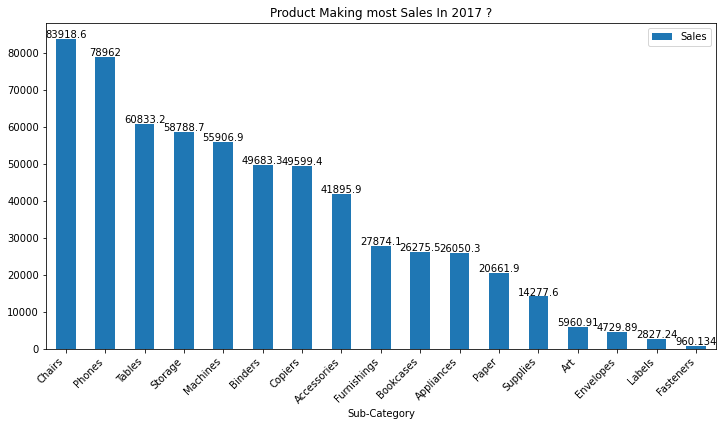

In [128]:
plt.figure(figsize=(12,6),dpi=200)
fig=two_sixty[['Sales','Sub-Category']].groupby('Sub-Category').sum().sort_values('Sales',ascending=False).plot(kind='bar',figsize=(12,6))
plt.title('Product Making most Sales In 2017 ?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

IN 2016 NOVEMBER IS THE MOST SHIPPING MONTH AND ALSO THE MOST ORDER_MONTH.

IN 2016 MARCH MAKE THE MOST SALES

IN 2016 OCTOBER MAKE THE MOST PROFIT

IN 2016 OUR RUNNING LOST WAS MINIMIZE WE ONLY HAVE TWO ITEM RUNNING LOST ITEMS

WHY COPIERS TILL REMAIN MOST LEADING PROFITABLE GOODS.

CHAIRS IS THE MOST SELLABLE ITEMS IN 2016

# 2015 Analysis

In [130]:
twofifty=df[df['Year_Order']==2015]

In [131]:
twofifty

Row ID        Order ID Order Date Ship Date.1       Ship Mode  \
3       1988  CA-2015-127509 2015-11-09  2015-11-13  Standard Class   
4       1989  CA-2015-127509 2015-11-09  2015-11-13  Standard Class   
5       1990  CA-2015-127509 2015-11-09  2015-11-13  Standard Class   
6       1991  CA-2015-127509 2015-11-09  2015-11-13  Standard Class   
18      9102  CA-2015-163181 2015-11-07  2015-11-12  Standard Class   
...      ...             ...        ...         ...             ...   
9953    6883  CA-2015-137113 2015-12-01  2015-12-05    Second Class   
9954    6884  CA-2015-137113 2015-12-01  2015-12-05    Second Class   
9970    3418  CA-2015-151841 2015-04-27  2015-05-02  Standard Class   
9971    3419  CA-2015-151841 2015-04-27  2015-05-02  Standard Class   
9972    3698  CA-2015-151680 2015-11-19  2015-11-21    Second Class   

     Customer ID       Customer Name      Segment        Country         City  \
3       AS-10090  Adam Shillingsburg     Consumer  United States  Springfield   
4       AS-10090  Adam Shillingsburg     Consumer  United States  Springfield   
5       AS-10090  Adam Shillingsburg     Consumer  United States  Springfield   
6       AS-10090  Adam Shillingsburg     Consumer  United States  Springfield   
18      AB-10105       Adrian Barton     Consumer  United States      Houston   
...          ...                 ...          ...            ...          ...   
9953    TW-21025   Tamara Willingham  Home Office  United States      Seattle   
9954    TW-21025   Tamara Willingham  Home Office  United States      Seattle   
9970    TC-21475        Tony Chapman  Home Office  United States       Aurora   
9971    TC-21475        Tony Chapman  Home Office  United States       Aurora   
9972    TC-21475        Tony Chapman  Home Office  United States      Seattle   

      ...    Sales  Quantity Discount    Profit Year_Order DayName_OrderPlace  \
3     ...    17.22         3      0.0    7.9212       2015             Monday   
4     ...  1024.38         7      0.0  215.1198       2015             Monday   
5     ...    26.22         3      0.0   12.3234       2015             Monday   
6     ...    17.34         3      0.0    8.4966       2015             Monday   
18    ...    23.64         3      0.2    5.3190       2015           Saturday   
...   ...      ...       ...      ...       ...        ...                ...   
9953  ...   146.73         3      0.0    2.9346       2015            Tuesday   
9954  ...   114.20         5      0.0   52.5320       2015            Tuesday   
9970  ...    43.56         5      0.2    3.2670       2015             Monday   
9971  ...     5.84         2      0.2    0.7300       2015             Monday   
9972  ...   141.96         2      0.0   22.7136       2015           Thursday   

     OrderPlace_MonthName  SHipDate_DayName  SHipDate_Year  SHipDate_MonthName  
3                November            Friday           2015            November  
4                November            Friday           2015            November  
5                November            Friday           2015            November  
6                November            Friday           2015            November  
18               November          Thursday           2015            November  
...                   ...               ...            ...                 ...  
9953             December          Saturday           2015            December  
9954             December          Saturday           2015            December  
9970                April          Saturday           2015                 May  
9971                April          Saturday           2015                 May  
9972             November          Saturday           2015            November  

[2102 rows x 27 columns]

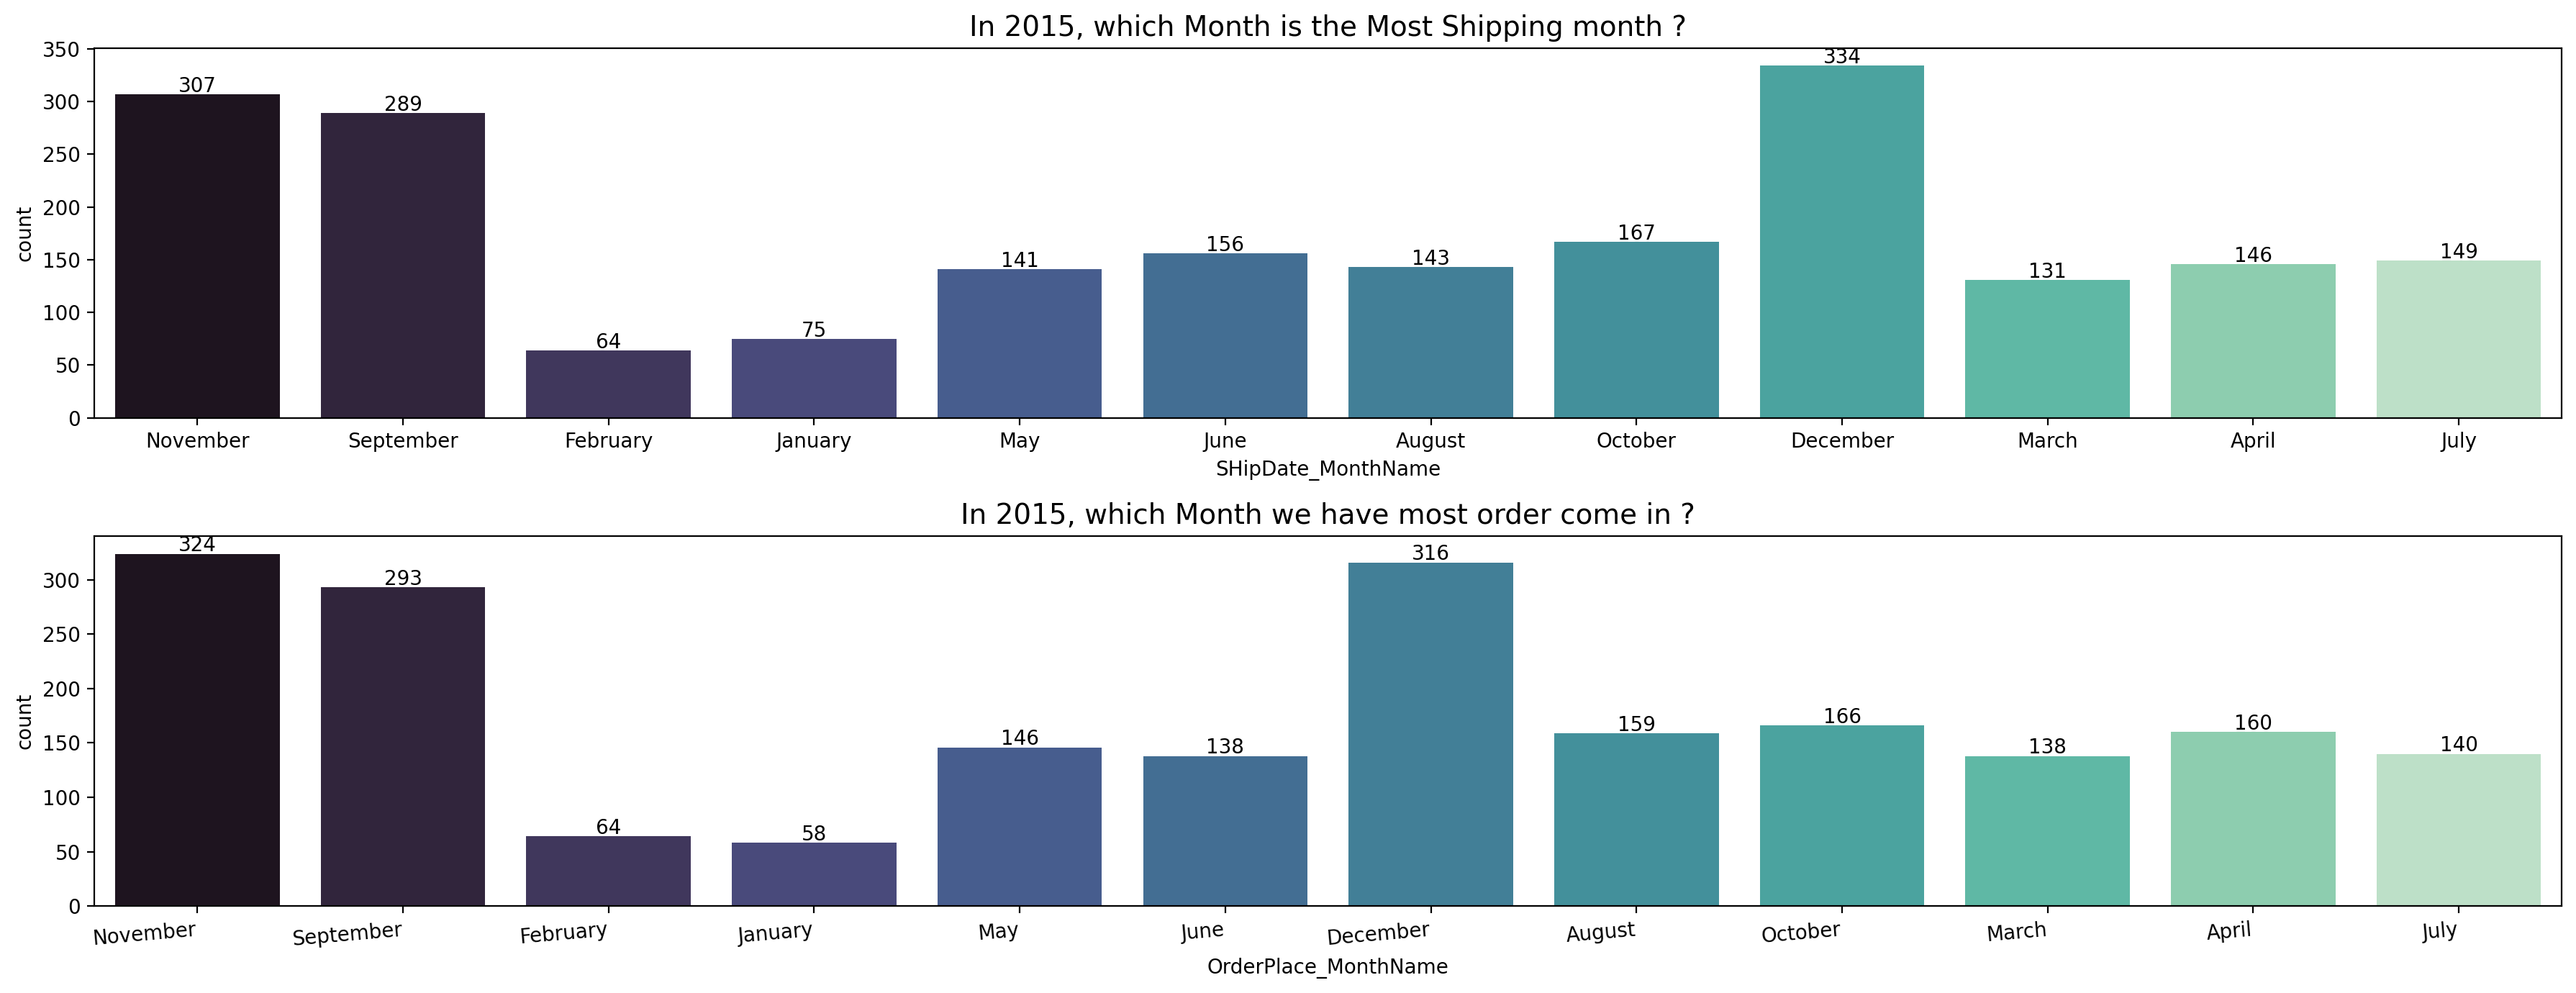

In [132]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.countplot(data=twofifty,x='SHipDate_MonthName',palette='mako',ax=ax[0])
ax[0].set_title('In 2015, which Month is the Most Shipping month ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.countplot(data=twofifty,x='OrderPlace_MonthName',palette='mako',ax=ax[1])
ax[1].set_title('In 2015, which Month we have most order come in ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

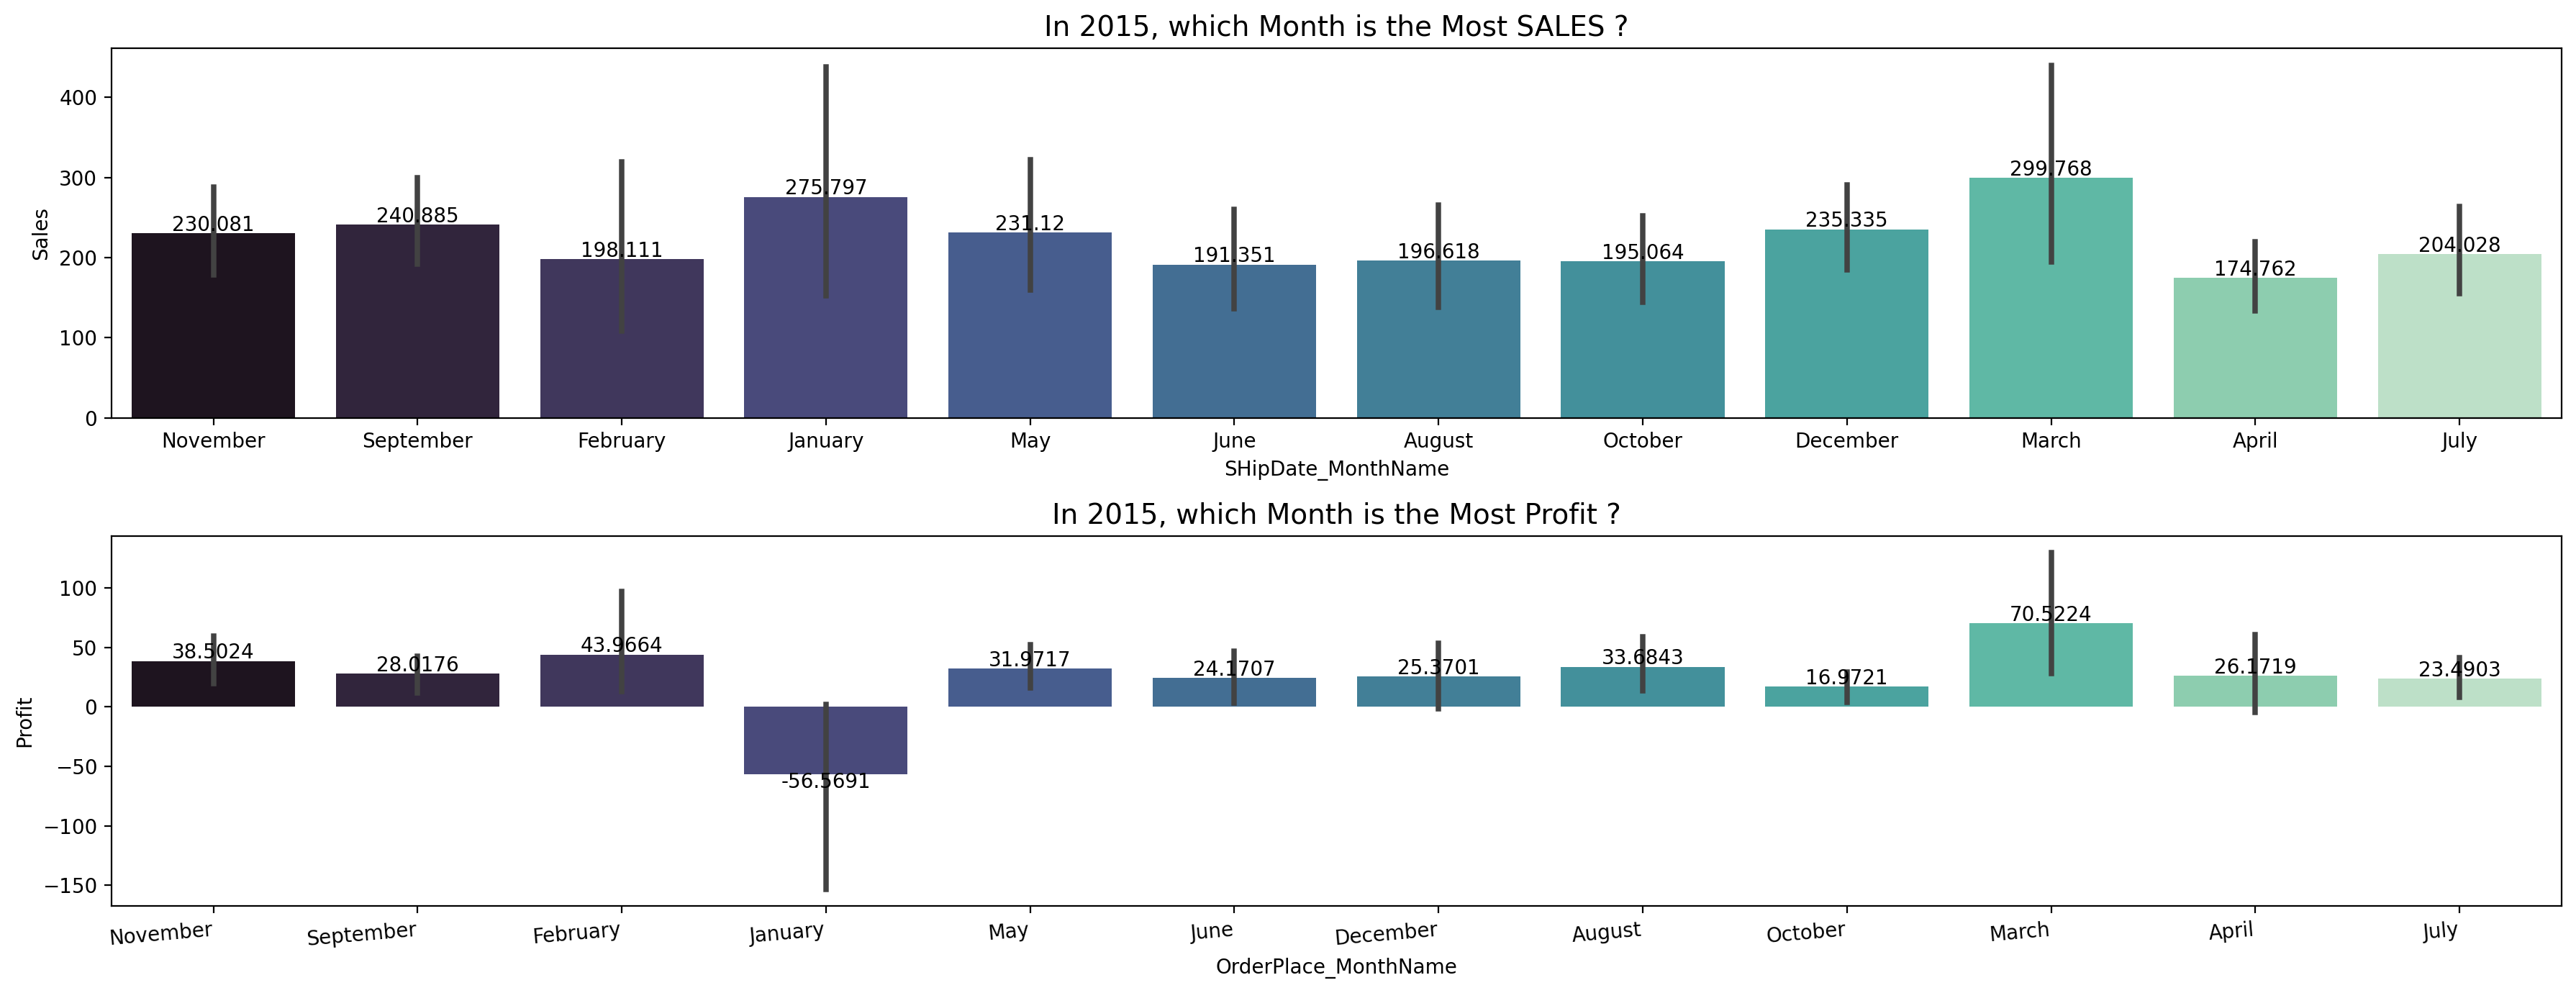

In [133]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.barplot(data= twofifty,x='SHipDate_MonthName',y='Sales',palette='mako',ax=ax[0])
ax[0].set_title('In 2015, which Month is the Most SALES ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.barplot(data= twofifty,x='OrderPlace_MonthName',y='Profit',palette='mako',ax=ax[1])
ax[1].set_title('In 2015, which Month is the Most Profit ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

THE MOST SALES MARKET IS MARCH WHILE THE MOST LOWEST PROFIT IS THE JANUARY

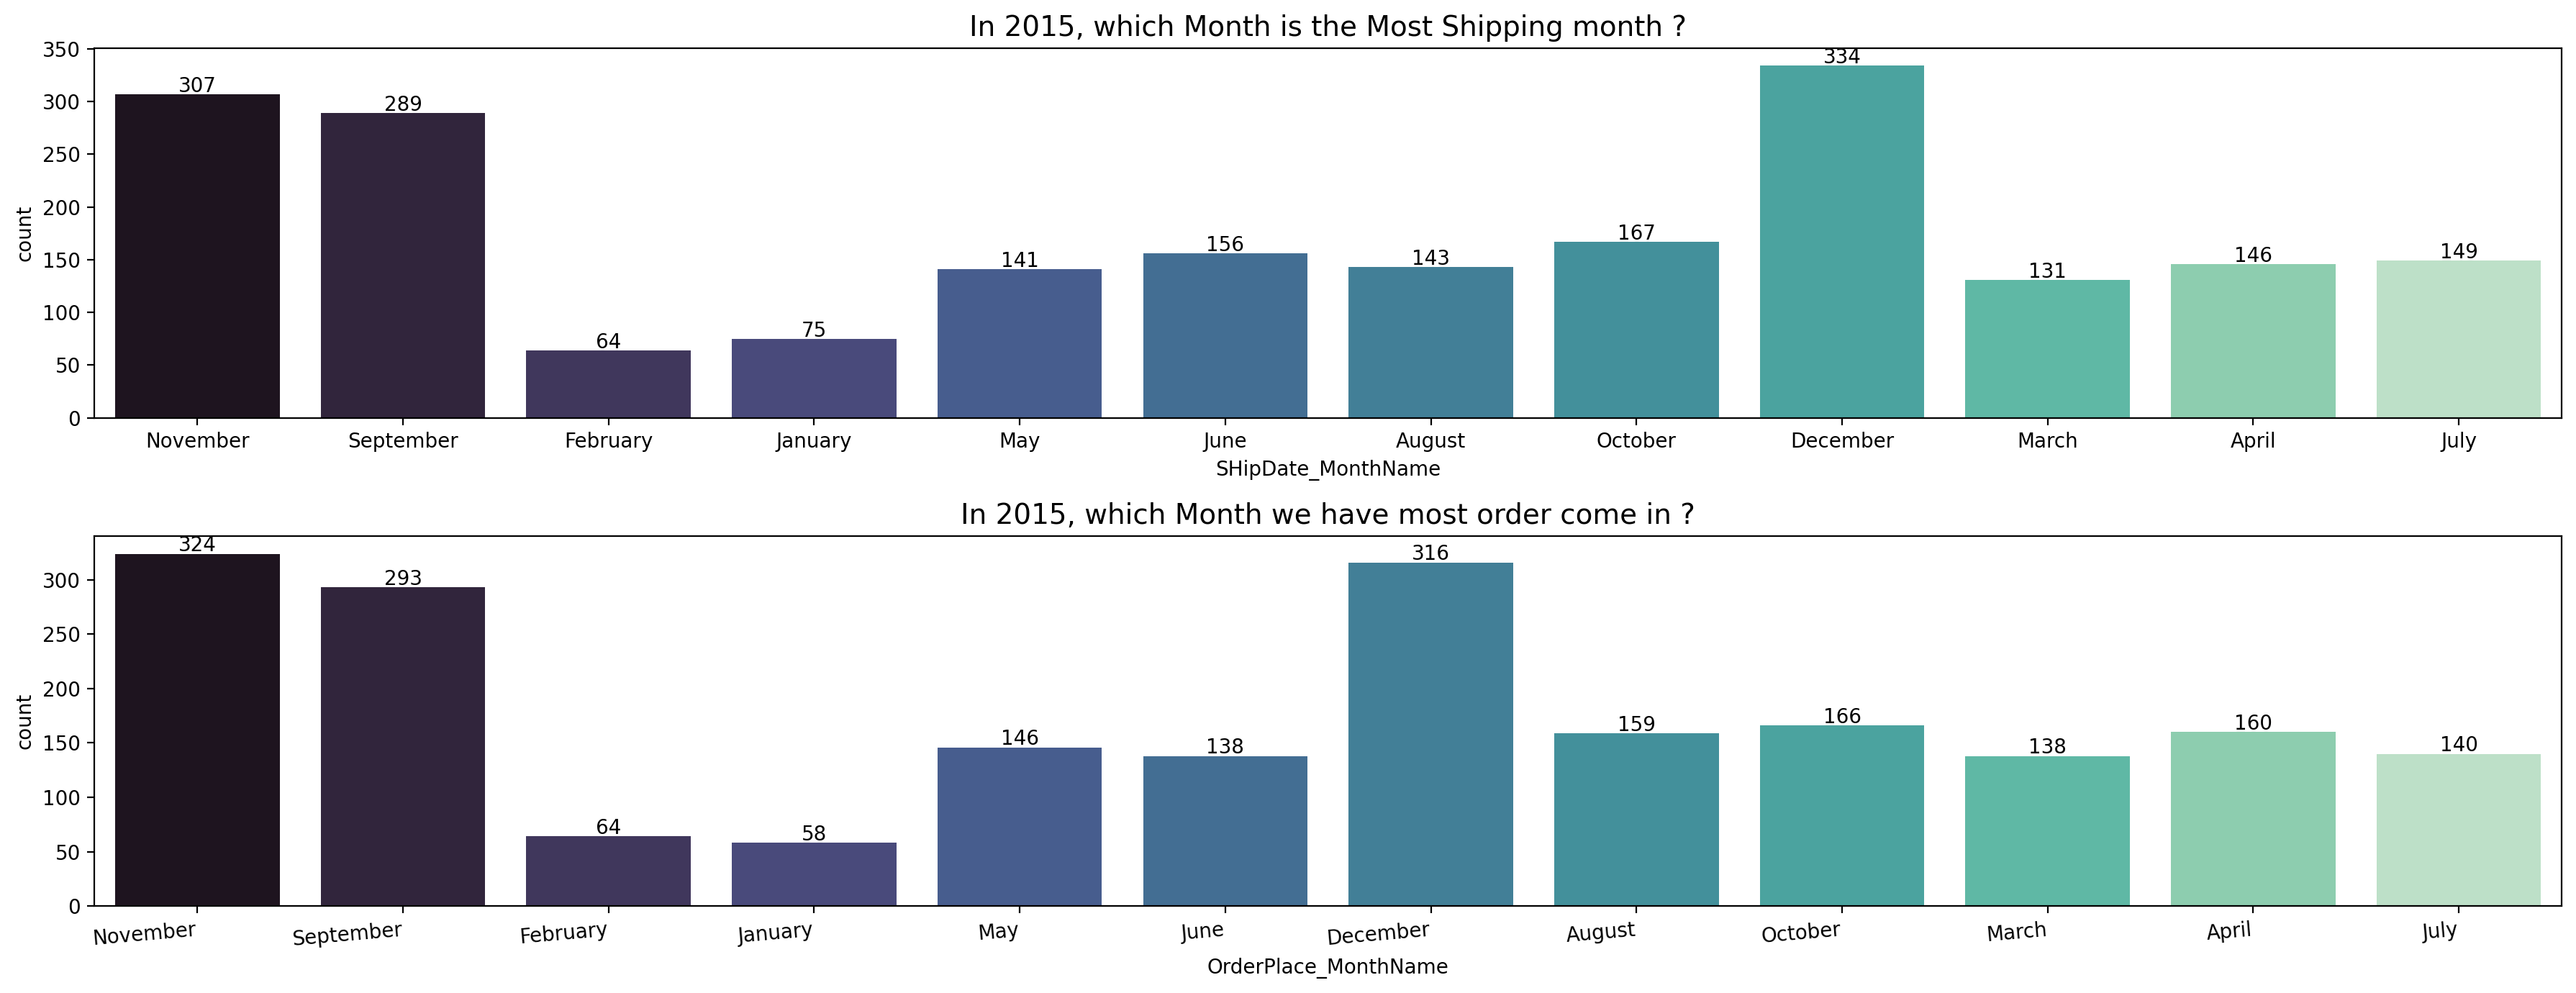

In [146]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.countplot(data=twofifty,x='SHipDate_MonthName',palette='mako',ax=ax[0])
ax[0].set_title('In 2015, which Month is the Most Shipping month ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.countplot(data=twofifty,x='OrderPlace_MonthName',palette='mako',ax=ax[1])
ax[1].set_title('In 2015, which Month we have most order come in ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

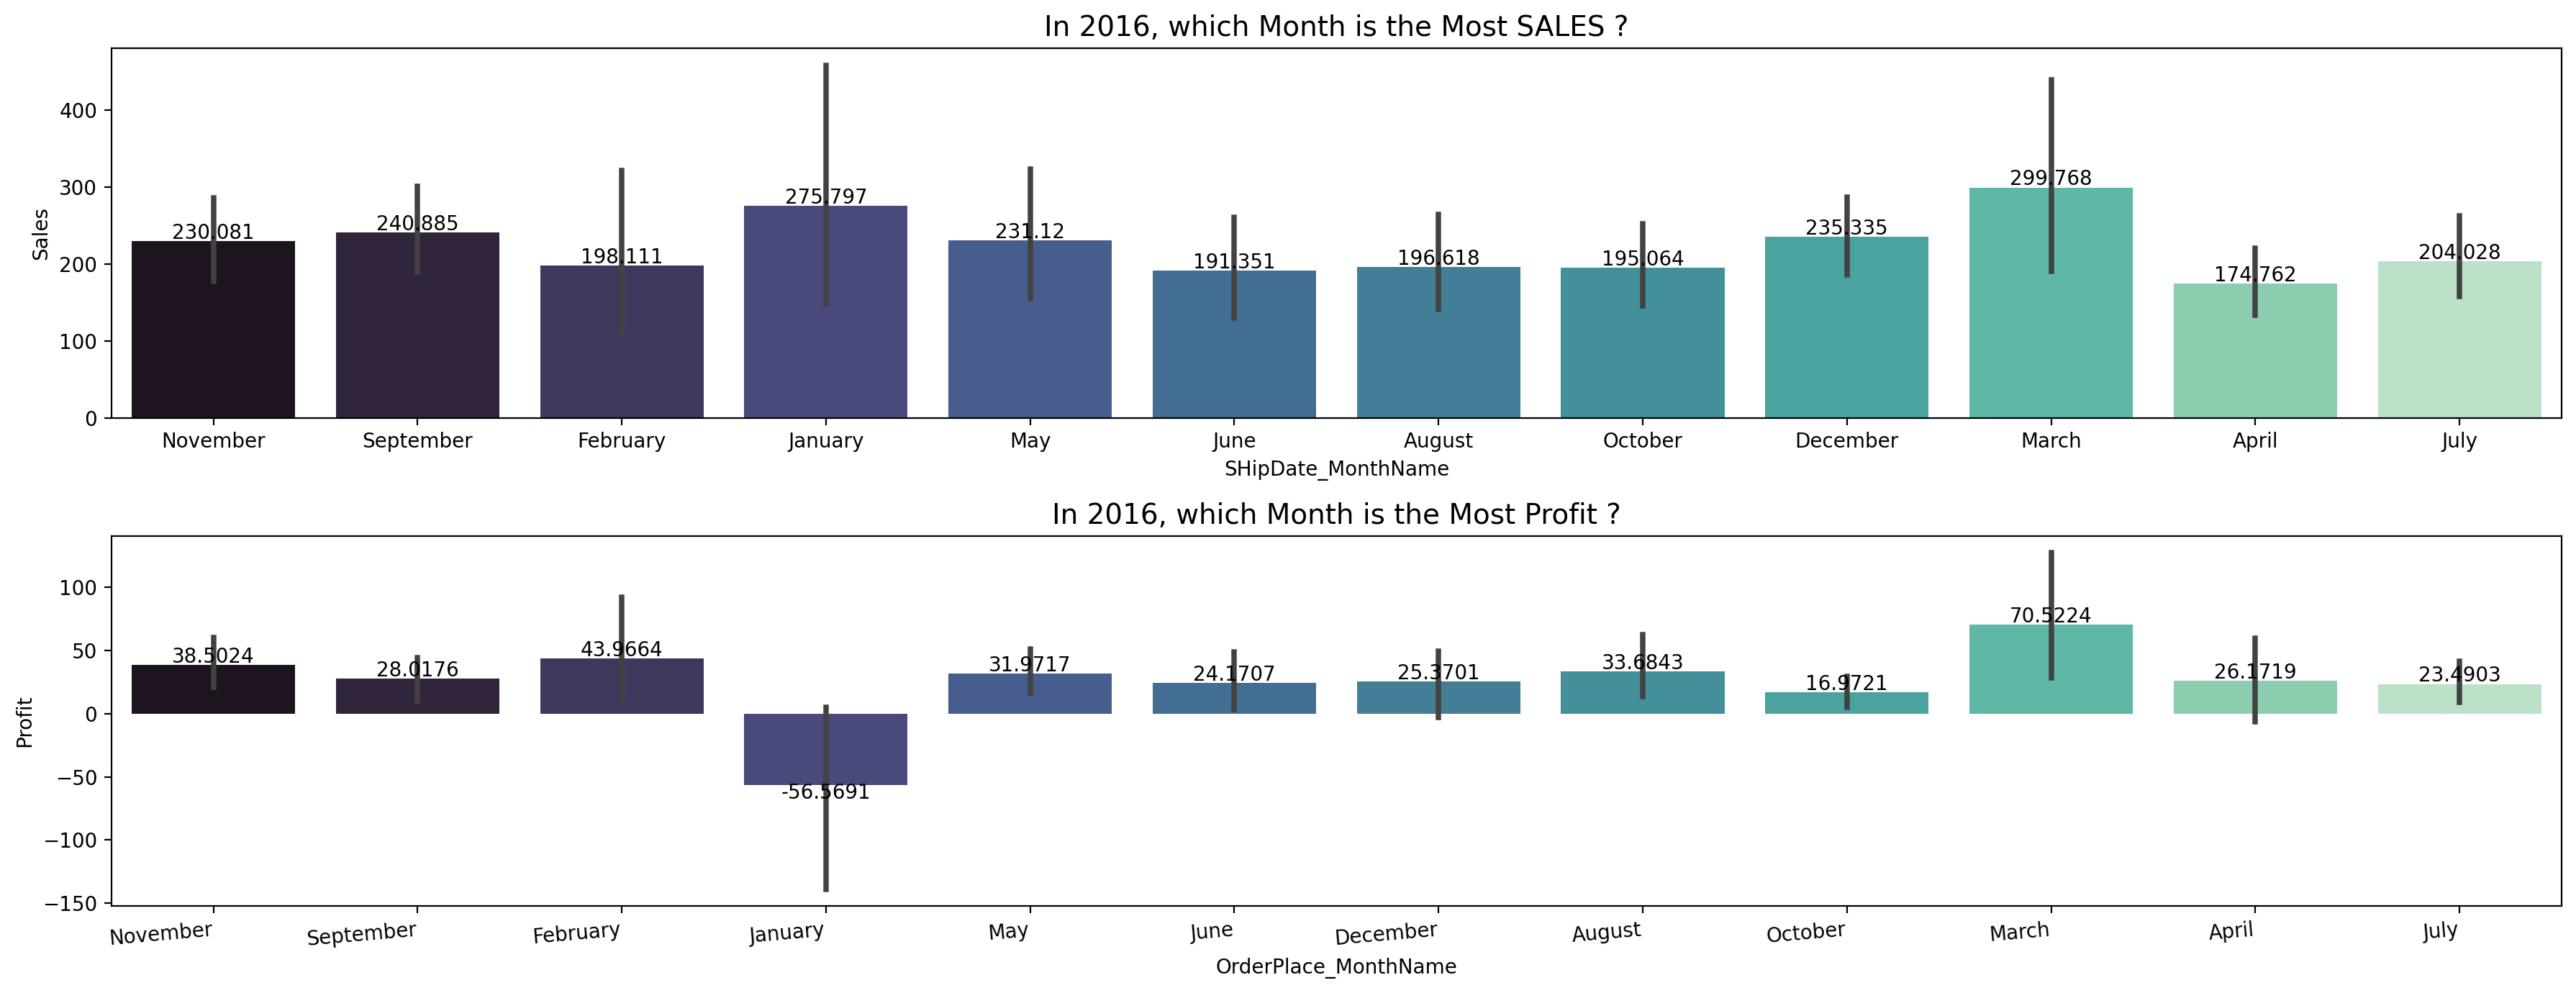

In [147]:
#Month by shipping and Ordering ?

fig,ax=plt.subplots(2,1,figsize=(18,7),dpi=200)
figg=sns.barplot(data= twofifty,x='SHipDate_MonthName',y='Sales',palette='mako',ax=ax[0])
ax[0].set_title('In 2016, which Month is the Most SALES ?',fontsize=14)
plt.xticks(rotation=45,ha='right')
fig.tight_layout()

for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.barplot(data= twofifty,x='OrderPlace_MonthName',y='Profit',palette='mako',ax=ax[1])
ax[1].set_title('In 2016, which Month is the Most Profit ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

IN 2015; 

IN THE MONTH OF JANUARY THE COMPANY IS RUNNING AT LOST AND THE SECOND MOST SALES.

WHILE MARCH IS THE MOST HIGHEST SALES IN MARCH.

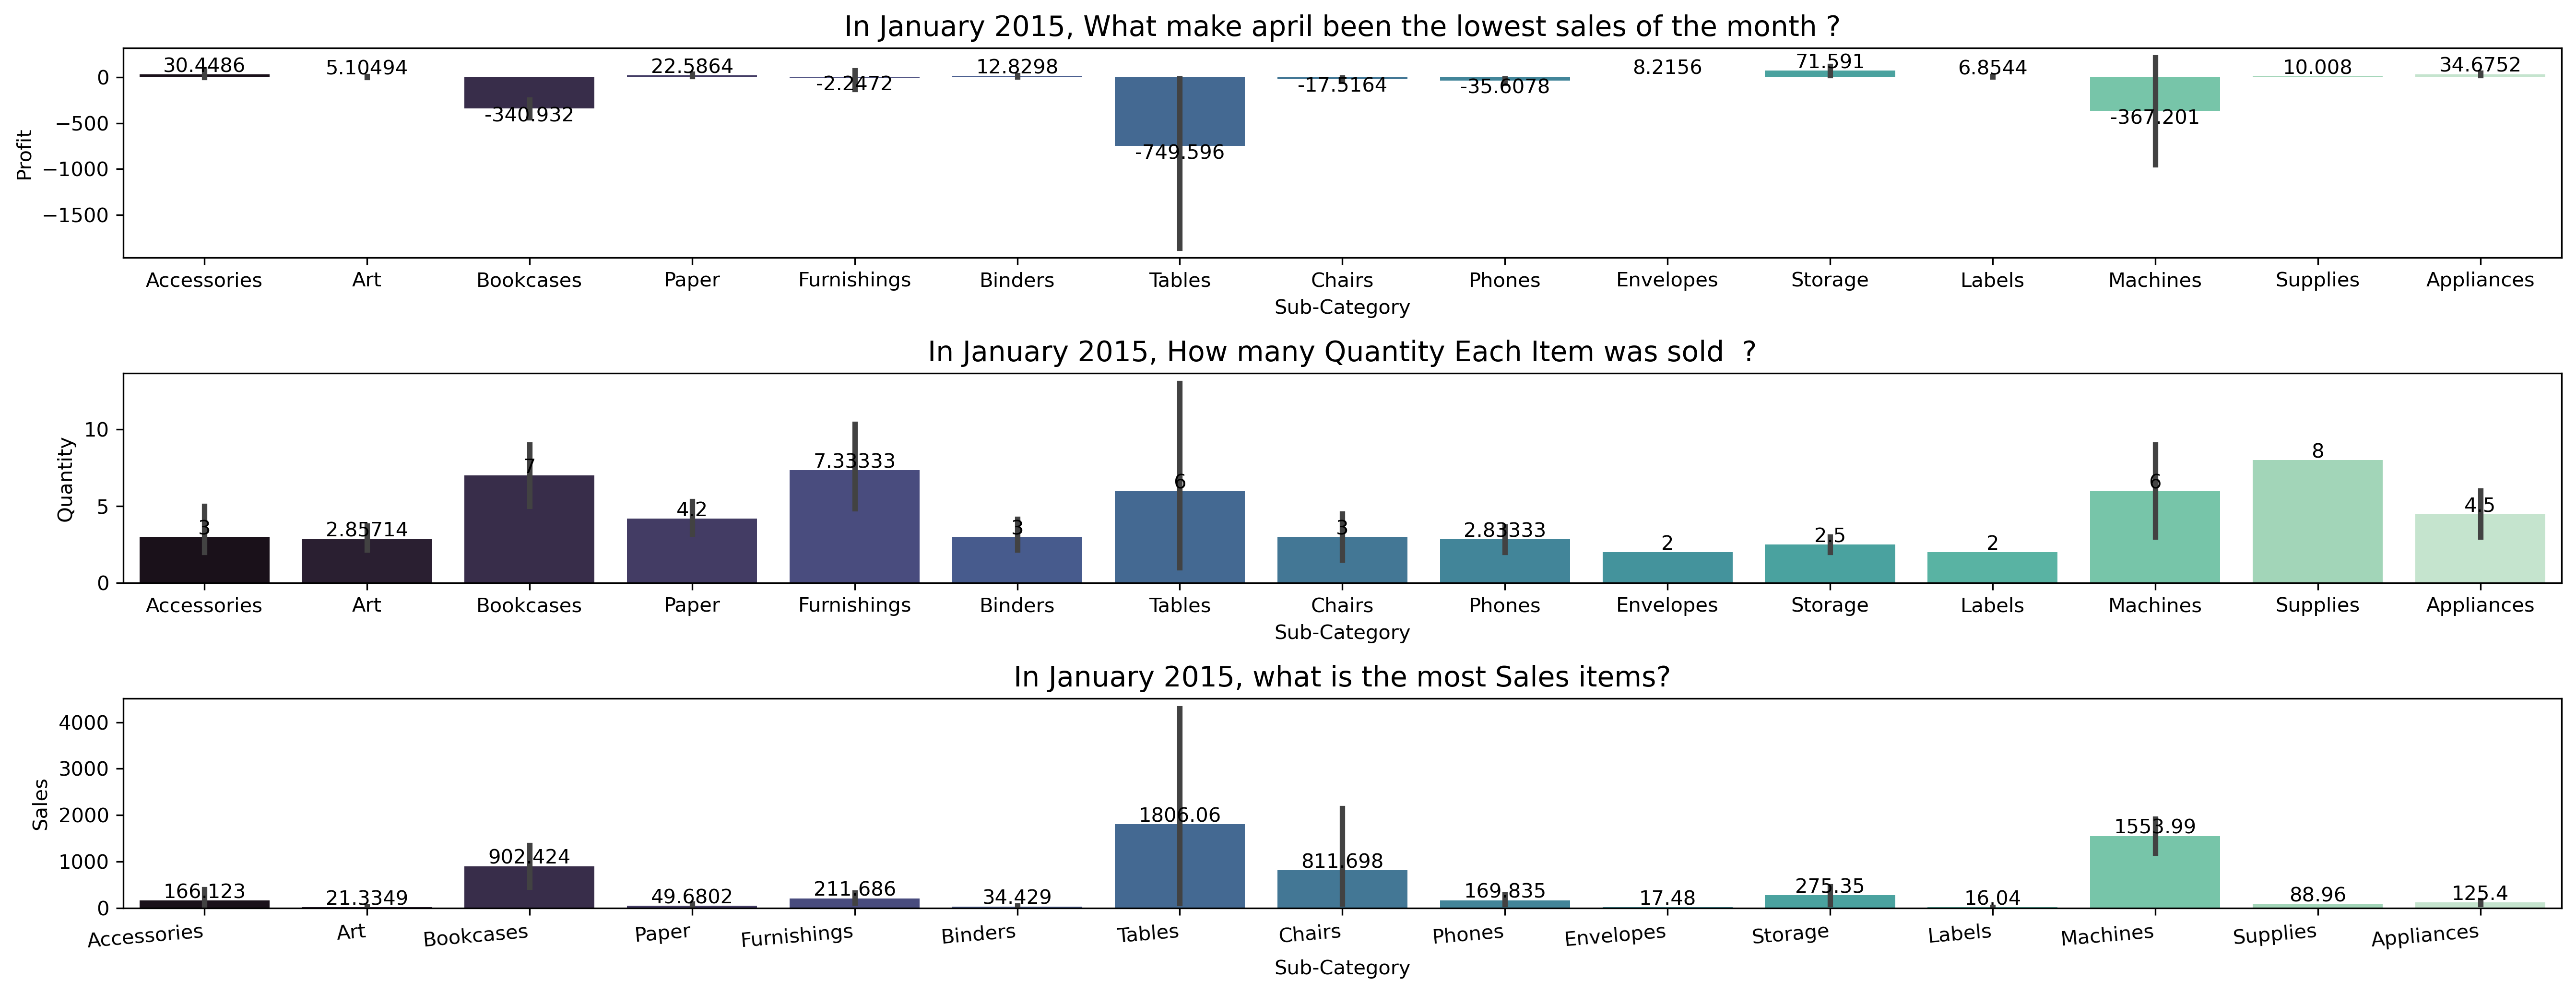

In [153]:
#WHAT CAN BE THE MOST RUNNING LOST IN JANUARY??

january=twofifty[twofifty['OrderPlace_MonthName']=='January']

fig,ax=plt.subplots(3,1,figsize=(18,7),dpi=300)
figg=sns.barplot(data=january,x='Sub-Category',y='Profit',palette='mako',ax=ax[0])
ax[0].set_title('In January 2015, What make april been the lowest sales of the month ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
    
figg=sns.barplot(data=january,x='Sub-Category',y='Quantity',palette='mako',ax=ax[1])
ax[1].set_title('In January 2015, How many Quantity Each Item was sold  ?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

figg=sns.barplot(data=january,x='Sub-Category',y='Sales',palette='mako',ax=ax[2])
ax[2].set_title('In January 2015, what is the most Sales items?',fontsize=14)
plt.xticks(rotation=5,ha='right')
fig.tight_layout()


for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)

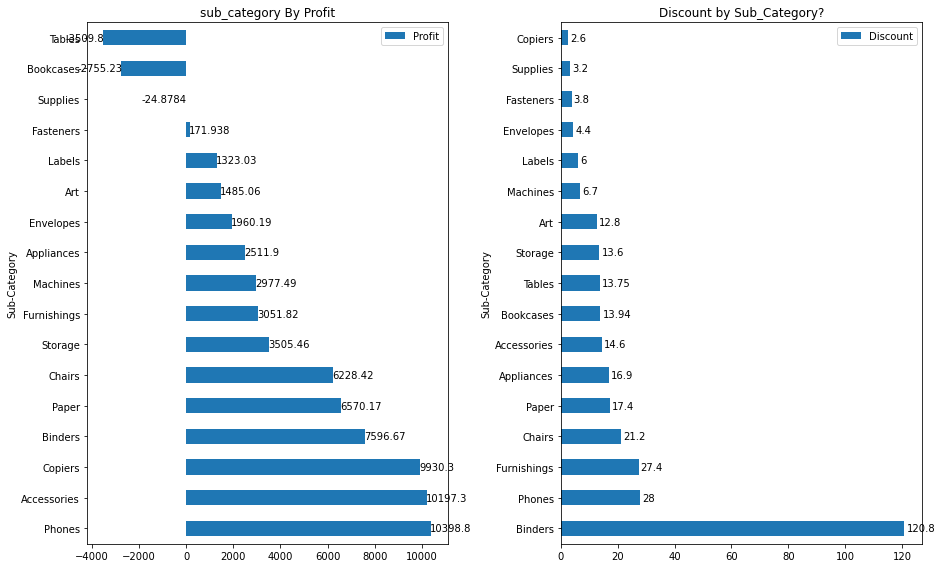

In [154]:
fig,ax=plt.subplots(1,2)
figg=twofifty[['Profit','Sub-Category']].groupby('Sub-Category').sum().sort_values('Profit',ascending=False).plot.barh(figsize=(13,8),ax=ax[0])
ax[0].set_title('sub_category By Profit')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=-1)
figg=twofifty[['Discount','Sub-Category']].groupby('Sub-Category').sum().sort_values('Discount',ascending=False).plot.barh(figsize=(13,8),ax=ax[1])
ax[1].set_title('Discount by Sub_Category?')
fig.tight_layout()
for container in figg.containers:
    figg.bar_label(container,label_type='edge',padding=2)

<Figure size 2400x1200 with 0 Axes>

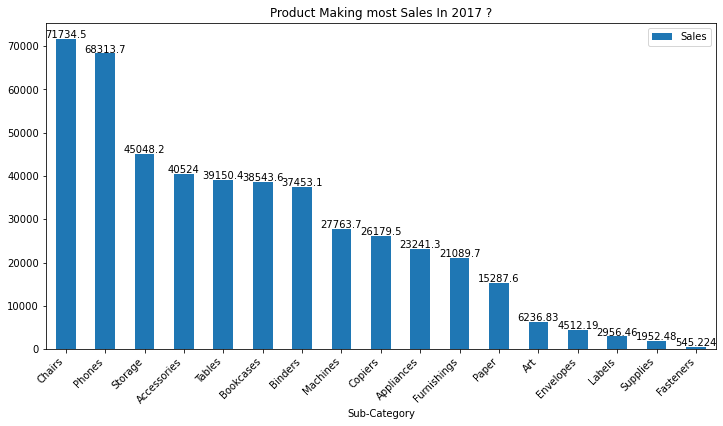

In [155]:
plt.figure(figsize=(12,6),dpi=200)
fig=twofifty[['Sales','Sub-Category']].groupby('Sub-Category').sum().sort_values('Sales',ascending=False).plot(kind='bar',figsize=(12,6))
plt.title('Product Making most Sales In 2017 ?')
plt.xticks(rotation=45,ha='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

In 2015:
    
    THE MOST PROFITABLE ITEMS IN 2015 IS PHONES.
    
    THE PRODUCT ITEMS CHAIRS IS THE MOST SALES ITEMS.